<a href="https://colab.research.google.com/github/FatoniRahmat/Portofolio-Data-Analyst-in-Python/blob/main/Olist_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OLIST CUSTOMER SEGMENTATION**

**Problem Statement**
* One of the main business concerns of online retailers is finding out what are customers' purchase behavior patterns and who are the most valuable customers to the business and what are their distinct characteristics. The problem is that from the data that we have, we can only define the characteristics of the whole Brazilian customers. We cannot know if there are any different segments of the customers, and the defining characteristics of each group. By understanding the customer segments, the company can better understand the customers' behavior and act on this knowledge accordingly.

**My Task**
* Group customers based on their behavior so that they are divided into several segments.
* Find out the defining characteristics in each customer segment.

#Setup Environment & Run Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

#Load Data

In [2]:
#Read data from google sheet
#customer dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1IL82kQMgHYZeRPr62gzmP8f9glzz8n42HzoZLLGQ_nI/edit#gid=2032522730'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_customer = pd.read_csv(sheet_url_trf)
#payment dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/17vAohx6PhkXgNJe5pNmnsC6TzNb1alvbtn0JpHu1xEI/edit#gid=1693078295'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_payment = pd.read_csv(sheet_url_trf)
#order dataset
sheet_url = 'https://docs.google.com/spreadsheets/d/1qA8gBQIkPoYZjV__2nA02wTSLLnwWhr09AHMeUkP6Ss/edit#gid=159122296'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_order = pd.read_csv(sheet_url_trf)

In [3]:
#Checking customer dataset
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df_customer.shape))

dataset has 99441 rows and 5 columns


In [5]:
#Checking payment dataset
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df_payment.shape))

dataset has 103886 rows and 5 columns


In [7]:
#Checking order dataset
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 0:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 3:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 0:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 8:38:49,2018-08-08 8:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 0:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 0:28:42,2017-12-15 0:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 0:00:00


In [8]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df_order.shape))

dataset has 99441 rows and 8 columns


#Basic Steps
1. Check variable names

2. Check data type

3. Handle missing values

4. Check duplicate records

5. Checking summary statistics

##1. Check variable names
Column names provide a clear identification of the data contained within each column. By reviewing the column names, i can quickly understand the type of information stored in each column. This helps me make sense of the data and interpret it correctly.


In [9]:
#Check columns
df_customer.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [10]:
df_payment.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [11]:
df_order.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

The column name data contained in each column is very clear.

##2. Check data type
Checking the data types is an important step in data cleaning because it helps ensure the consistency, accuracy, and reliability of the data.

In [12]:
#Check data type
print(df_customer.info(), '\n')
print(df_payment.info(), '\n')
print(df_order.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 n

Based on data documentation, we must check whether the data type of variables is correct or not. The result shows, there is something wrong about "order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date" from Order Dataset.

In [13]:
#Change data type
df_order['order_purchase_timestamp'] = pd.to_datetime(df_order.order_purchase_timestamp).dt.tz_localize(None)
df_order['order_approved_at'] = pd.to_datetime(df_order.order_approved_at).dt.tz_localize(None)
df_order['order_delivered_carrier_date'] = pd.to_datetime(df_order.order_delivered_carrier_date).dt.tz_localize(None)
df_order['order_delivered_customer_date'] = pd.to_datetime(df_order.order_delivered_customer_date).dt.tz_localize(None)
df_order['order_estimated_delivery_date'] = pd.to_datetime(df_order.order_estimated_delivery_date).dt.tz_localize(None)
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##3. Handle missing values
Checking for missing values is an important step in data cleaning because missing values can have a significant impact on the quality and reliability of the data analysis. Missing values can lead to incomplete or inaccurate data, which can skew the analysis and produce misleading results. By identifying and handling missing values appropriately, me ensure the integrity and reliability of the data.

From checking the data type I found missing values from the Order Dataset.

In [14]:
#Check the amount of missing values
def nulls(df_order):
    null_values = pd.DataFrame(df_order.isnull().sum())
    null_values[1] = null_values[0] / len(df_order)
    null_values.columns = ['count','%pct']
    filtered_null = null_values[null_values['%pct'] > 0].sort_values(by='%pct', ascending=False)
    return filtered_null
nulls(df_order)

,count,%pct
order_delivered_customer_date,2965,0.029817
order_delivered_carrier_date,1783,0.017930
order_approved_at,160,0.001609


In [15]:
#Details of missing values
col_order = df_order.columns.to_list()
col_null = col_order[4:7]
print("Identify missing value in df_order")
print("There are", len(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"]), "rows of missing values")
print(df_order[df_order[col_null].isnull().sum(axis=1) > 0]["order_status"].value_counts())
print("\nIdentify the non-missing value in df_order")
print(df_order[df_order[col_null].isnull().sum(axis=1) == 0]["order_status"].value_counts())

Identify missing value in df_order
There are 2980 rows of missing values
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: order_status, dtype: int64

Identify the non-missing value in df_order
delivered    96455
canceled         6
Name: order_status, dtype: int64


From the results above, we know that the missing values are mostly undelivered orders. Hence, I choose to drop them (focus on the delivered orders). The non-missing data (have deliver date) but has order_status canceled will be also dropped, because those are invalid data.

In [16]:
#Remove missing values
df_order.dropna(axis=0, inplace=True)
idx_drop = df_order[df_order['order_status']=='canceled'].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print(df_order.info(), "\n")
print(df_order['order_status'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96455 non-null  object        
 1   customer_id                    96455 non-null  object        
 2   order_status                   96455 non-null  object        
 3   order_purchase_timestamp       96455 non-null  datetime64[ns]
 4   order_approved_at              96455 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96455 non-null  datetime64[ns]
 6   order_delivered_customer_date  96455 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96455 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None 

delivered    96455
Name: order_status, dtype: int64


##4. Check duplicate rows
Duplicate rows can compromise the integrity of the dataset. If we have multiple identical rows, it can lead to inaccurate statistical analysis, misleading results, and duplicate entries in downstream processes. By identifying and removing duplicate rows, we ensure that the data accurately represents the underlying information.

In [17]:
#Check for duplicate data
print("Duplicated customer data = ", df_customer.duplicated().sum())
print("Duplicated payment data = ", df_payment.duplicated().sum())
print("Duplicated order data = ", df_order.duplicated().sum())

Duplicated customer data =  0
Duplicated payment data =  0
Duplicated order data =  0


In [18]:
#Check for duplicate ID data
print("Duplicated customer_id in customer data = ", df_customer['customer_id'].duplicated().sum())
print("Duplicated order_id in payment data = ", df_payment['order_id'].duplicated().sum())
print("Duplicated order_id in order data = ", df_order['order_id'].duplicated().sum())

Duplicated customer_id in customer data =  0
Duplicated order_id in payment data =  4446
Duplicated order_id in order data =  0


In [19]:
#Show duplicate data
df_payment[df_payment['order_id'].duplicated(keep=False)].sort_values(by=['order_id'])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
80856,0016dfedd97fc2950e388d2971d718c7,2,voucher,1,17.92
89575,0016dfedd97fc2950e388d2971d718c7,1,credit_card,5,52.63
20036,002f19a65a2ddd70a090297872e6d64e,1,voucher,1,44.11
98894,002f19a65a2ddd70a090297872e6d64e,2,voucher,1,33.18
30155,0071ee2429bc1efdc43aa3e073a5290e,2,voucher,1,92.44
...,...,...,...,...,...
21648,ffa1dd97810de91a03abd7bd76d2fed1,2,voucher,1,418.73
32912,ffa39020fe7c8a3e907320e1bec4b985,1,credit_card,1,7.13
3009,ffa39020fe7c8a3e907320e1bec4b985,2,voucher,1,64.01
75188,ffc730a0615d28ec19f9cad02cb41442,1,credit_card,1,14.76


After seeing the duplicate data, there is no problem, because only ID data is duplicated so data will not be deleted.

#Adding Columns

The payment_type of duplicated order_id --> create new columns (one hot encoding) to represent the various payment type chosen by customers, then sum them (grouping). While total payment_value of duplicated order_id will be the sum of them (grouping)

In [20]:
#Added payment type column
df_dummy = pd.get_dummies(df_payment, columns=['payment_type'], prefix=['payment_type'])
df_dummy.drop(columns=['payment_type_not_defined'], inplace=True)
df_payment_2 = df_dummy.groupby(['order_id']).sum()
df_payment_2.drop(columns=['payment_sequential', 'payment_installments'], inplace=True)
df_payment_2 = df_payment_2.reset_index()
df_payment_2

,order_id,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,0,1,0,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,0,1,0,0
2,000229ec398224ef6ca0657da4fc703e,216.87,0,1,0,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,0,1,0,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,0,1,0,0
...,...,...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,1,0,0,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,1,0,0,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,0,1,0,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,0,1,0,0


In [21]:
#Check for duplicate data
print("Duplicated payment data = ", df_payment_2.duplicated().sum())
print("Duplicated order_id in payment data = ", df_payment_2['order_id'].duplicated().sum())

Duplicated payment data =  0
Duplicated order_id in payment data =  0


#Sanity Checking
Sanity checking your dataset for data integrity is essential to have accurate analysis and running machine learning models. Cross field validation should come in after you dealt with most of the other cleaning issues like missing value imputation, ensuring field constraints are in place, etc.
1. Check cross-field

2. Check data range & Identify outliers

3. Remove irrelevant column(s)

##1. Check cross-field
Cross-field validation is when a validation rule needs to use another field's value to validate the current field.

In [22]:
#Cross field orders with delivery
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date']
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data")
print("The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer")

There are 1373 invalid data
The order must be customer purchase --> payment approved --> delivered by carrier --> delivered to customer


In [23]:
#Amount of data after cross-field
print("From", len(df_order), "data")
idx_drop = df_order[cross_field].index.to_list()
df_order.drop(index=idx_drop, inplace=True)
print("There are", len(df_order), "data remaining")

From 96455 data
There are 95082 data remaining


In [24]:
#Invalid data after dropping
A = df_order['order_purchase_timestamp'] <= df_order['order_approved_at']
B = df_order['order_approved_at'] <= df_order['order_delivered_carrier_date']
C = df_order['order_delivered_carrier_date'] <= df_order['order_delivered_customer_date']
cross_field = ~(A & B & C)
print("There are", cross_field.sum(), "invalid data after dropping")

There are 0 invalid data after dropping


##2. Check data range & Identify outliers
Determine what classifies as an outlier and decide whether to remove extreme values from a data set.

###Payment Value

In [25]:
#Payment info
df_payment_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  99440 non-null  object 
 1   payment_value             99440 non-null  float64
 2   payment_type_boleto       99440 non-null  uint8  
 3   payment_type_credit_card  99440 non-null  uint8  
 4   payment_type_debit_card   99440 non-null  uint8  
 5   payment_type_voucher      99440 non-null  uint8  
dtypes: float64(1), object(1), uint8(4)
memory usage: 1.9+ MB


[Text(0.5, 1.0, 'Check outliers on payment value'),
 Text(0.5, 0, 'payment_value')]

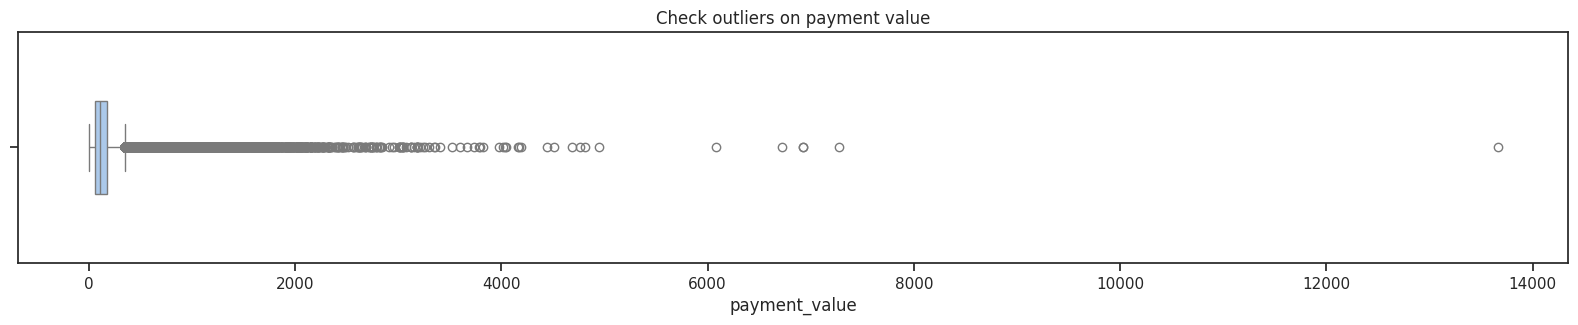

In [26]:
#Check outliers on payment value
sns.set_theme(style="ticks", palette="pastel")
f, ax = plt.subplots(figsize=(20, 3),dpi=100)
ax = sns.boxplot(x=df_payment_2['payment_value'], width=0.4)
ax.set(title="Check outliers on payment value", xlabel="payment_value")

In [27]:
#Displays the number of data outliers
Q1 = df_payment_2['payment_value'].quantile(0.25)
Q3 = df_payment_2['payment_value'].quantile(0.75)
IQR = Q3 - Q1
limit_up = Q3 + 1.5*IQR
limit_down = Q1 - 1.5*IQR
print("Upper limit =", limit_up, "& Lower limit =", limit_down)
outlier_up = df_payment_2['payment_value'] > limit_up
outlier_down = df_payment_2['payment_value'] < limit_down
outlier = (outlier_up | outlier_down)
print("In total there are", outlier.sum(), "outliers from", len(df_payment_2), "data")

Upper limit = 349.40999999999997 & Lower limit = -110.43
In total there are 7866 outliers from 99440 data


<Axes: xlabel='payment_value', ylabel='Count'>

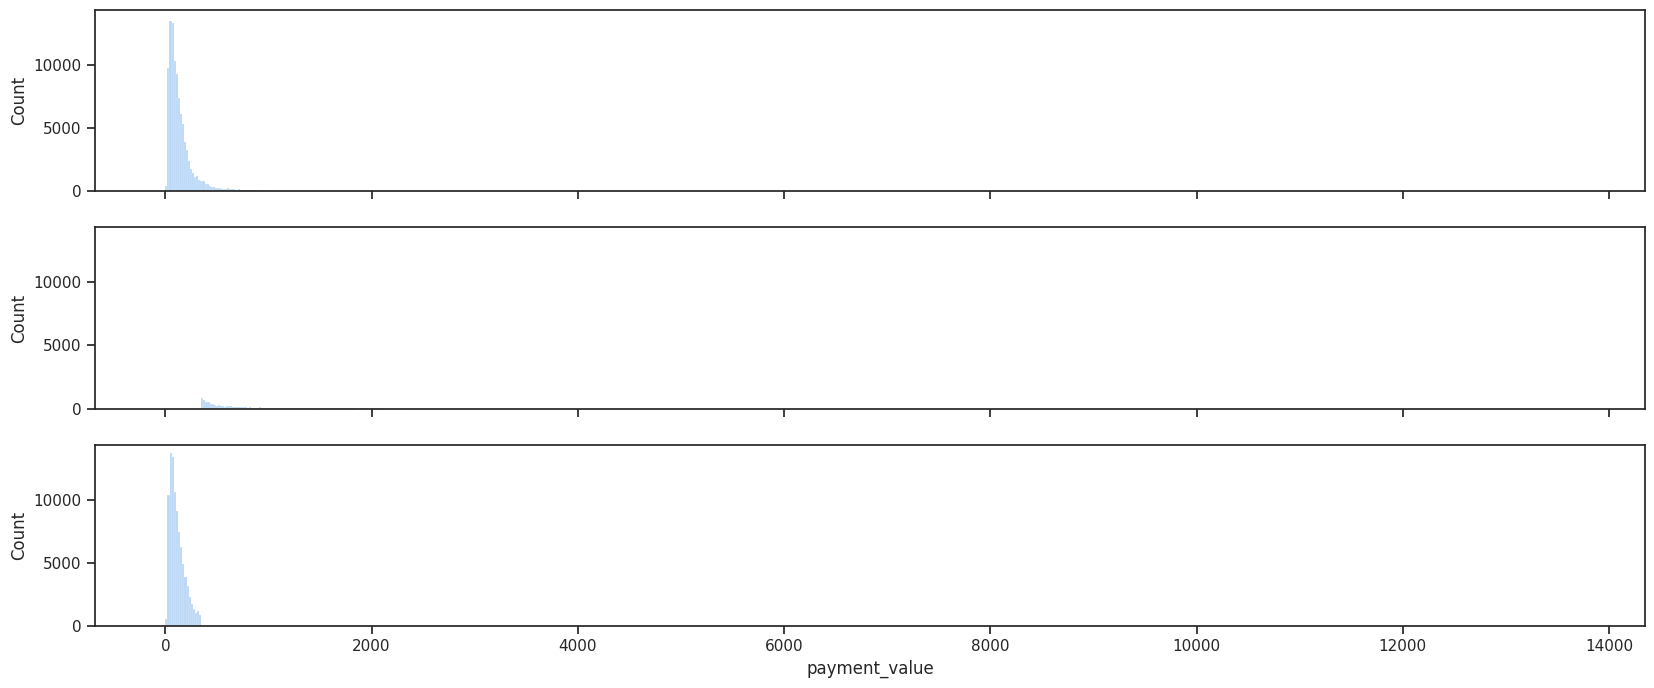

In [28]:
#Make an outlier graphic image
f, axs = plt.subplots(3, 1, figsize=(20, 8), sharex=True, sharey=True)
sns.histplot(ax=axs[0], data=df_payment_2, x="payment_value", binwidth=20)
sns.histplot(ax=axs[1], data=df_payment_2[outlier], x="payment_value", binwidth=20)
sns.histplot(ax=axs[2], data=df_payment_2[~outlier], x="payment_value", binwidth=20)

* I decided to remove outliers (7866 rows of data) because it is rare for customers to spend more than 350 per order because we analyzed normal customer behavior.

<Axes: xlabel='payment_value', ylabel='Count'>

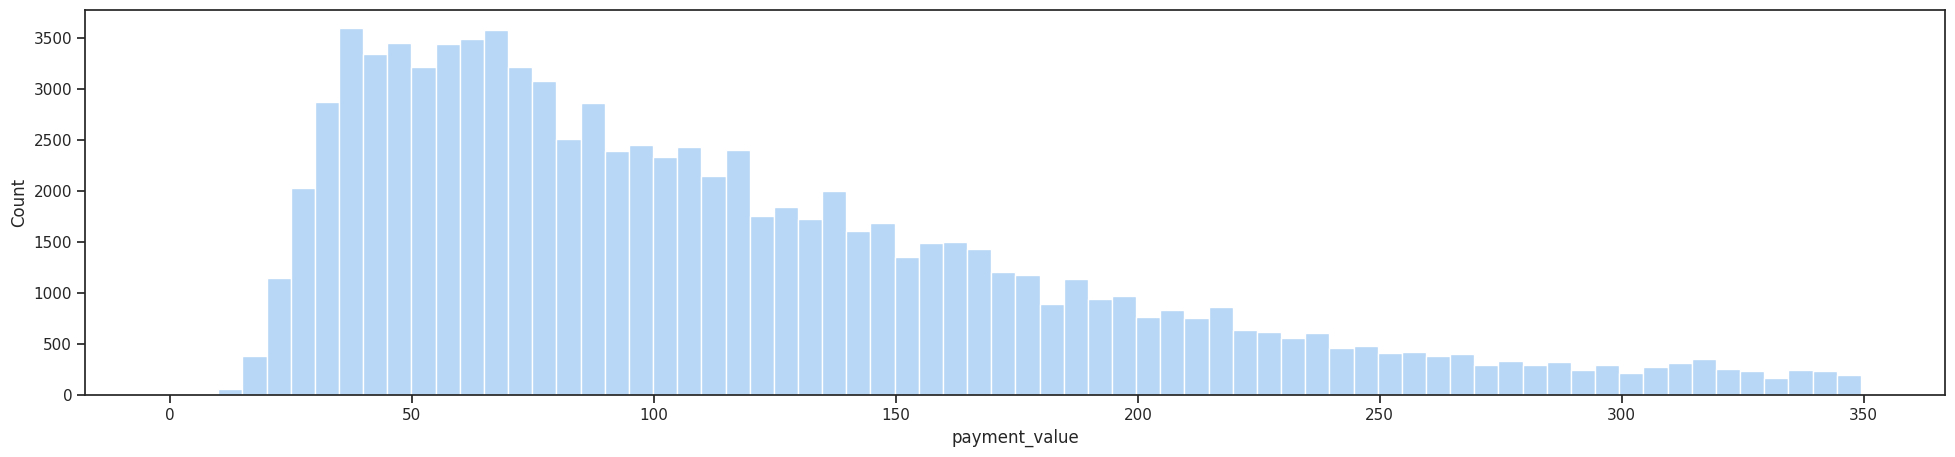

In [29]:
#Removing outlier data
idx_outlier = df_payment_2[outlier].index.to_list()
df_payment_2.drop(index=idx_outlier, inplace=True)
f, ax = plt.subplots(figsize=(24, 5))
sns.histplot(data=df_payment_2, x="payment_value", binwidth=5)

###Actual Delivery Time

In [30]:
#Order.info
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95082 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       95082 non-null  object        
 1   customer_id                    95082 non-null  object        
 2   order_status                   95082 non-null  object        
 3   order_purchase_timestamp       95082 non-null  datetime64[ns]
 4   order_approved_at              95082 non-null  datetime64[ns]
 5   order_delivered_carrier_date   95082 non-null  datetime64[ns]
 6   order_delivered_customer_date  95082 non-null  datetime64[ns]
 7   order_estimated_delivery_date  95082 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.5+ MB


[Text(0.5, 1.0, 'Check outliers on delivery time'),
 Text(0.5, 0, 'delivery time (days)')]

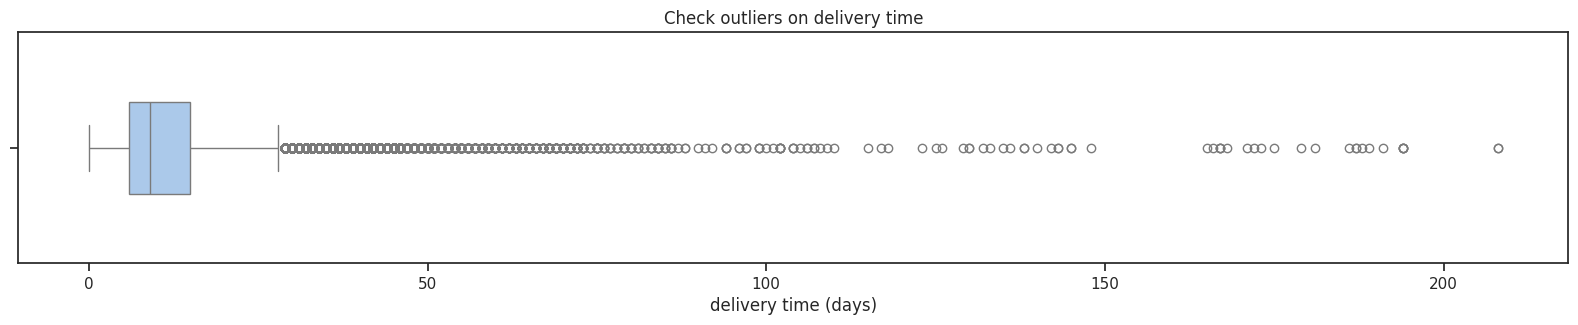

In [31]:
#Check outliers on delivery time
df_order['actual_delivery_time'] = (df_order['order_delivered_customer_date'] - df_order['order_approved_at']).dt.days
f, ax = plt.subplots(figsize=(20, 3),dpi=100)
ax = sns.boxplot(x=df_order['actual_delivery_time'], width=0.4)
ax.set(title="Check outliers on delivery time", xlabel="delivery time (days)")

In [32]:
#Displays the number of data outliers
Q1 = df_order['actual_delivery_time'].quantile(0.25)
Q3 = df_order['actual_delivery_time'].quantile(0.75)
IQR = Q3 - Q1
limit_up = Q3 + 1.5*IQR
limit_down = Q1 - 1.5*IQR
print("Upper limit =", limit_up, "& Lower limit =", limit_down)
outlier_up = df_order['actual_delivery_time'] > limit_up
outlier_down = df_order['actual_delivery_time'] < limit_down
outlier = (outlier_up | outlier_down)
print("In total there are", outlier.sum(), "candidate outliers from", len(df_order), "data")

Upper limit = 28.5 & Lower limit = -7.5
In total there are 4758 candidate outliers from 95082 data


Text(0.5, 1.0, 'Histogram of data without outliers')

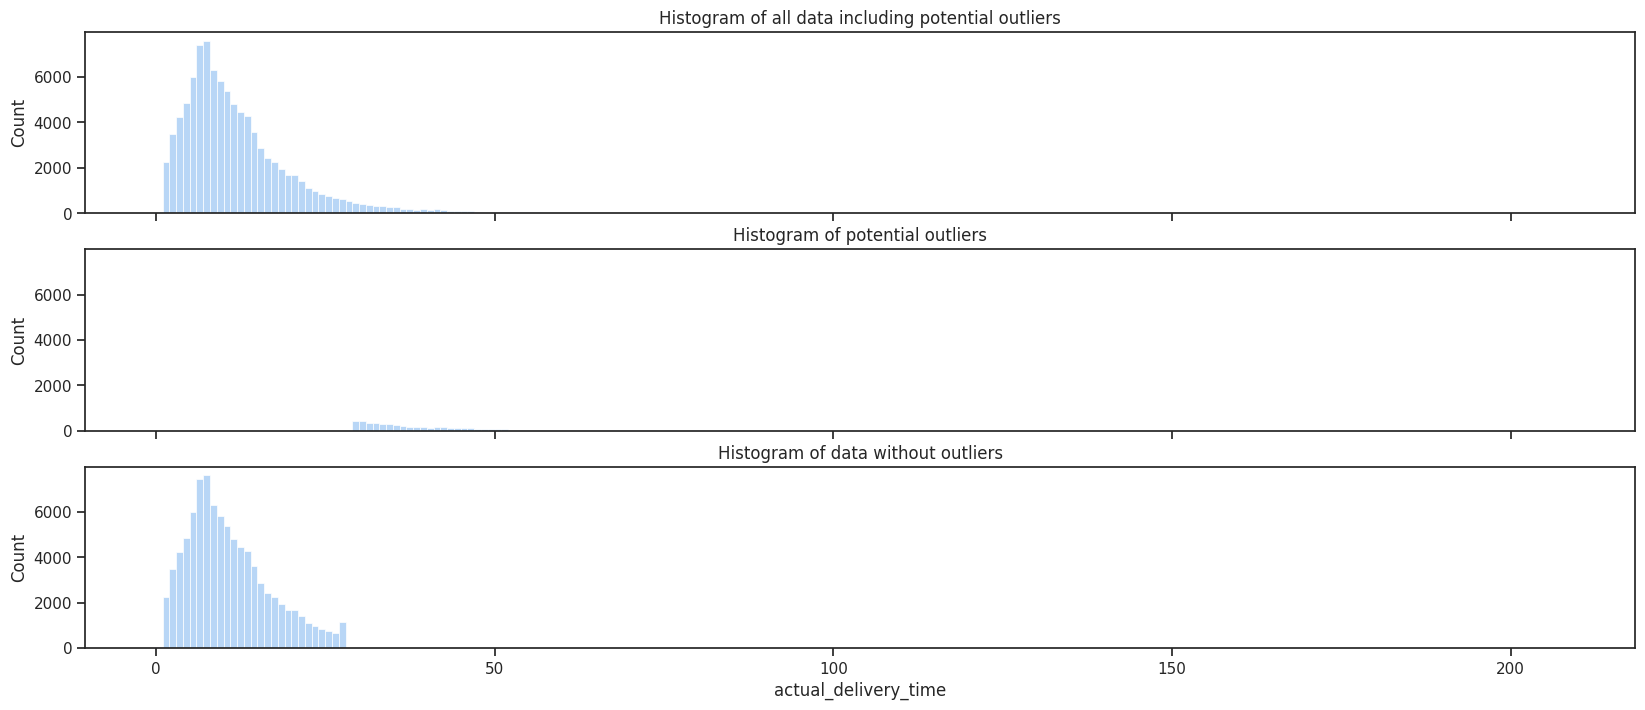

In [33]:
#Make an outlier graphic image
f, axs = plt.subplots(3, 1, figsize=(20, 8), sharex=True, sharey=True)
sns.histplot(ax=axs[0], data=df_order, x="actual_delivery_time", binwidth=1)
axs[0].set_title("Histogram of all data including potential outliers")
sns.histplot(ax=axs[1], data=df_order[outlier], x="actual_delivery_time", binwidth=1)
axs[1].set_title("Histogram of potential outliers")
sns.histplot(ax=axs[2], data=df_order[~outlier], x="actual_delivery_time", binwidth=1)
axs[2].set_title("Histogram of data without outliers")

* I decided to remove those outliers. But from these there's an important thing to notice that the existence of these outliers could be due to incorrect date input or there's flaw in our delivery system. Further investigation should be done to know the exact reason.

<Axes: xlabel='actual_delivery_time', ylabel='Count'>

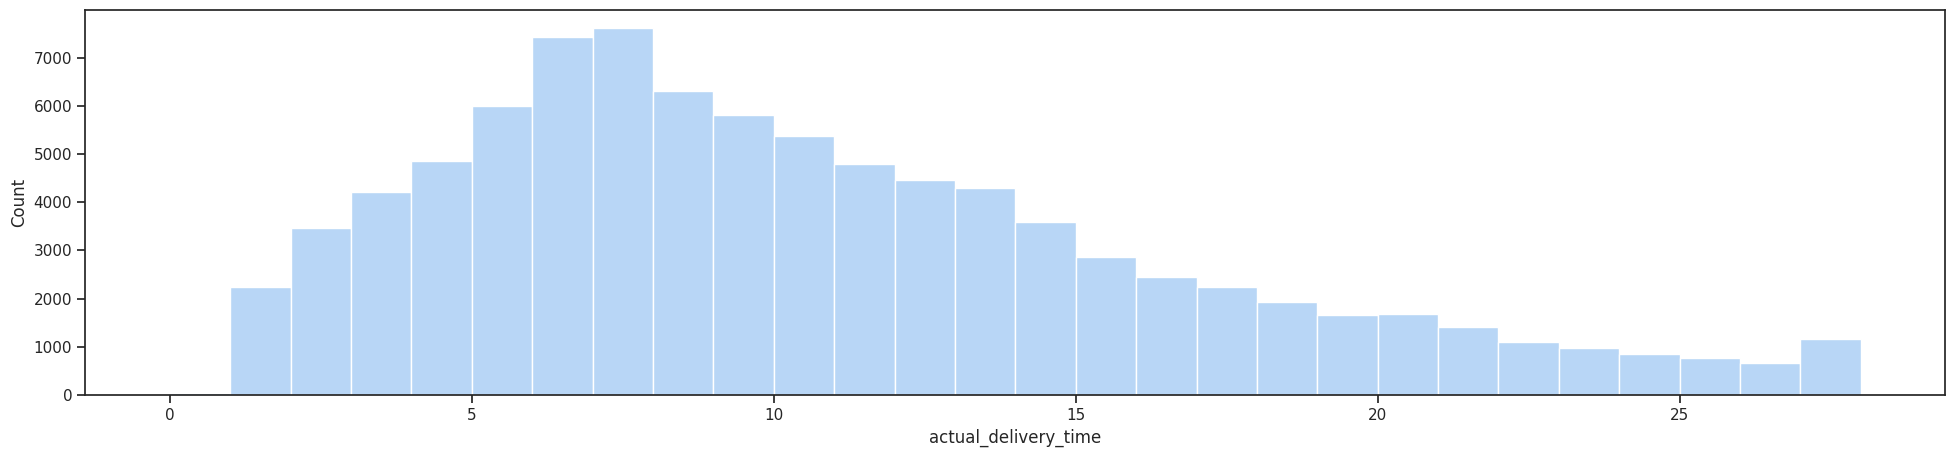

In [34]:
#Removing outlier data
idx_outlier = df_order[outlier].index.to_list()
df_order.drop(index=idx_outlier, inplace=True)
f, ax = plt.subplots(figsize=(24, 5))
sns.histplot(data=df_order, x="actual_delivery_time", binwidth=1)

##3. Remove irrelevant column(s)
We'll remove irrelevant column(s) as our analysis focus on these:
* Number of orders per month
* Daily orders trend
* Percentage of orders per payment type
* Customer segmentation (cluster analysis)

In [35]:
#Info dataframe
df_order_cleaned = df_order.copy()
df_customer_cleaned = df_customer.copy()
df_payment_cleaned = df_payment_2.copy()
df_order_cleaned.drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date'],
                      inplace=True)
df_customer_cleaned.drop(columns=['customer_unique_id', 'customer_zip_code_prefix'], inplace=True)
df_order_cleaned.info()
print('/n')
df_customer_cleaned.info()
print('/n')
df_payment_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90324 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       90324 non-null  object        
 1   customer_id                    90324 non-null  object        
 2   order_purchase_timestamp       90324 non-null  datetime64[ns]
 3   order_delivered_customer_date  90324 non-null  datetime64[ns]
 4   actual_delivery_time           90324 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.1+ MB
/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     99441 non-null  object
 1   customer_city   99441 non-null  object
 2   customer_state  99441 non-null  object
dtypes: object(3)
memor

In [36]:
#Join/Merge the dataset
df = df_order_cleaned.merge(df_customer_cleaned, on='customer_id', copy=False)
df = df.merge(df_payment_cleaned, on='order_id', copy=False)
print(df.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83444 entries, 0 to 83443
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       83444 non-null  object        
 1   customer_id                    83444 non-null  object        
 2   order_purchase_timestamp       83444 non-null  datetime64[ns]
 3   order_delivered_customer_date  83444 non-null  datetime64[ns]
 4   actual_delivery_time           83444 non-null  int64         
 5   customer_city                  83444 non-null  object        
 6   customer_state                 83444 non-null  object        
 7   payment_value                  83444 non-null  float64       
 8   payment_type_boleto            83444 non-null  uint8         
 9   payment_type_credit_card       83444 non-null  uint8         
 10  payment_type_debit_card        83444 non-null  uint8         
 11  payment_type_vo

#Export the File
Export cleaned data.

In [37]:
#Show dataset
df.head()

,order_id,customer_id,order_purchase_timestamp,order_delivered_customer_date,actual_delivery_time,customer_city,customer_state,payment_value,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,8,sao paulo,SP,38.71,0,1,0,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-08-07 15:27:45,12,barreiras,BA,141.46,1,0,0,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-17 18:06:29,9,vianopolis,GO,179.12,0,1,0,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-12-02 00:28:42,13,sao goncalo do amarante,RN,72.20,0,1,0,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-16 18:17:02,2,santo andre,SP,28.62,0,1,0,0


In [38]:
#Knowing the number of rows and columns
print("dataset has {} rows and {} columns".format(*df.shape))

dataset has 83444 rows and 12 columns


In [39]:
#Export data
df.to_csv('Olist_Dataset_Cleaned.csv')

#Exploratory Data Analysis (EDA)

* The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions.
* It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.

##1. Payment Value and Delivery Time

In [40]:
#Statistics of payment value and delivery time
import statistics as stat
from scipy.stats import kurtosis, skew

def Q1(x):
  return x.quantile(0.25)
def Q3(x):
  return x.quantile(0.75)
def Range(x):
  return x.max() - x.min()
def CoefVariation(x):
  return np.std(x)/np.mean(x)
col_num = ['payment_value', 'actual_delivery_time']
k = kurtosis(df[col_num])
s = skew(df[col_num])
cv = CoefVariation(df[col_num])
kurt_skew = {'payment_value': [k[0], s[0], cv[0]], 'actual_delivery_time': [k[1], s[1], cv[1]]}
kurt_skew = pd.DataFrame(kurt_skew, index=['Kurtosis', 'Skewness', 'Coef_Variation'])
desc_name = ['count', 'min', 'max', 'mean', 'median', stat.mode, Q1, Q3, Range, np.var, np.std]
desc_analysis = df[col_num].agg(desc_name)
desc_analysis = round(desc_analysis.append(kurt_skew),2)
desc_analysis

,payment_value,actual_delivery_time
count,83444.00,83444.00
min,9.59,0.00
max,349.40,28.00
mean,114.40,10.15
median,96.43,9.00
mode,77.57,7.00
Q1,58.13,6.00
Q3,154.58,14.00
Range,339.81,28.00
var,5200.37,36.72


In [41]:
#Statistics of payment column
col_pay = ['payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_voucher']
round(df[col_pay].describe(), 2)

,payment_type_boleto,payment_type_credit_card,payment_type_debit_card,payment_type_voucher
count,83444.0,83444.00,83444.00,83444.00
mean,0.2,0.77,0.02,0.06
std,0.4,0.43,0.12,0.41
min,0.0,0.00,0.00,0.00
25%,0.0,1.00,0.00,0.00
50%,0.0,1.00,0.00,0.00
75%,0.0,1.00,0.00,0.00
max,1.0,2.00,2.00,25.00


Text(0.5, 1.0, 'Histogram of Delivery Time')

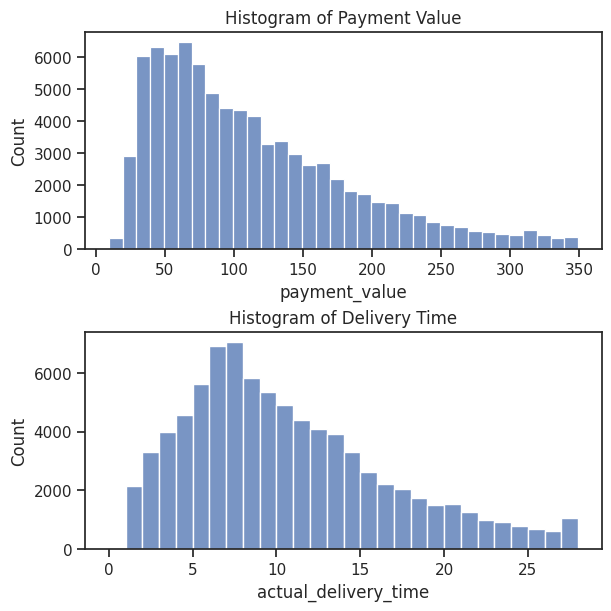

In [42]:
#Chart of payment values and delivery times
sns.set_theme(style="ticks")
f, axs = plt.subplots(2, 1, figsize=(6, 6), constrained_layout=True)
sns.histplot(df, x=col_num[0], binwidth=10, ax=axs[0])
sns.histplot(df, x=col_num[1], binwidth=1, ax=axs[1])
axs[0].set_title("Histogram of Payment Value")
axs[1].set_title("Histogram of Delivery Time")

**Insight:**
* Avg customer spending is 114 local currency per order
* Avg delivery time is 10 days (received by customer)
* Both variable has similar distribution (positive skew)

##2. Number of Orders per Month

In [43]:
#Orders per month
grouped_month = df.copy()
grouped_month['month'] = grouped_month['order_purchase_timestamp'].dt.strftime('%Y-%m')
grouped_month = grouped_month[['month', 'order_id']]
grouped_month = grouped_month.groupby(by=['month'], as_index=False).count()
grouped_month

,month,order_id
0,2016-10,192
1,2016-12,1
2,2017-01,629
3,2017-02,1444
4,2017-03,2246
5,2017-04,1966
6,2017-05,3195
7,2017-06,2847
8,2017-07,3496
9,2017-08,3800


Text(0.5, -0.3, 'Month Date')

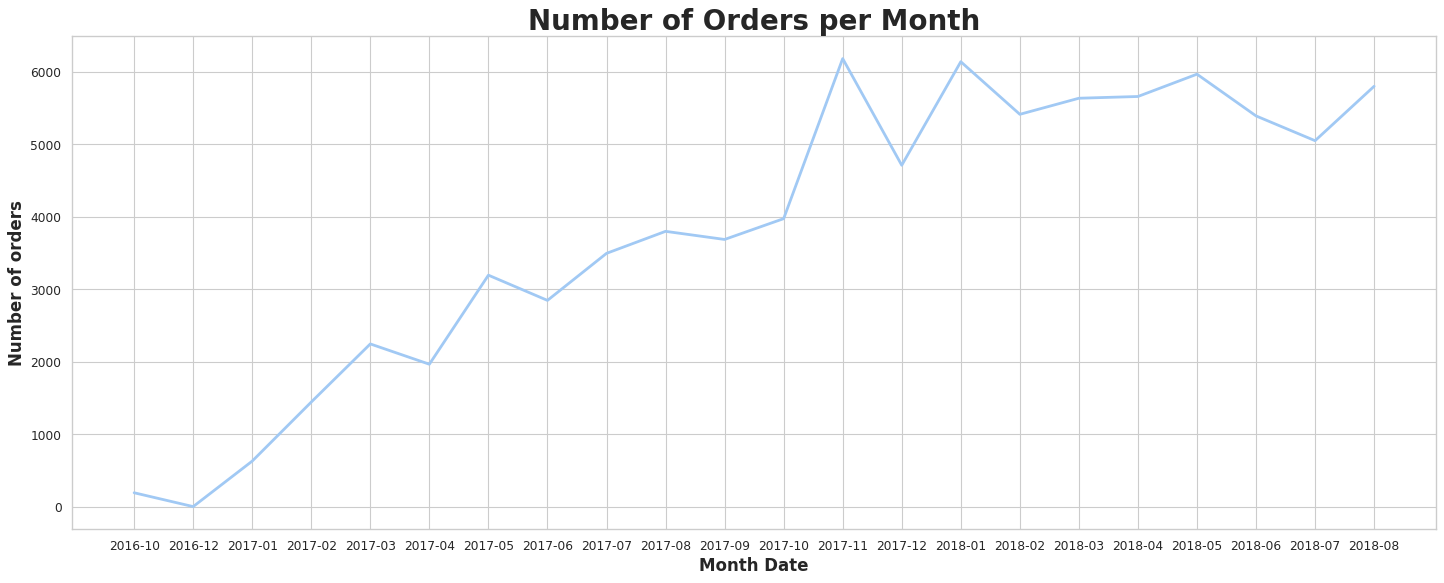

In [44]:
#Graph of orders per month
sns.set_theme(style="whitegrid", palette="pastel")
f, ax = plt.subplots(figsize=(22, 8),dpi=80)
sns.lineplot(x="month", y="order_id", data=grouped_month, linewidth=2.5)
ax.set_title("Number of Orders per Month", fontsize=25, fontweight='bold', position=(0.5,1.05))
ax.set_ylabel("Number of orders",fontsize=15, fontweight='bold', position=(-0.1,0.5))
ax.set_xlabel("Month Date",fontsize=15, fontweight='bold', position=(0.5,-0.3))

**Insight:**
* Monthly number of orders --> positive trend
* The highest number of orders was achieved in Novemeber 2017
* Currently, the number of orders (Jan-Aug 2018) is quite stable around 5000-6000 orders/month

##3. Monthly Transaction Value

In [45]:
#Number of transactions per month
grouped_month1 = df.copy()
grouped_month1['month'] = grouped_month1['order_purchase_timestamp'].dt.strftime('%Y-%m')
grouped_month1 = df.groupby(grouped_month1['month'])['payment_value'].agg(['sum']).reset_index()
print('Total Transaction Value : R$', grouped_month1['sum'].sum())
display(grouped_month1)

Total Transaction Value : R$ 9545629.629999999


,month,sum
0,2016-10,22037.09
1,2016-12,19.62
2,2017-01,68744.58
3,2017-02,160133.51
4,2017-03,252802.08
5,2017-04,227004.10
6,2017-05,360611.95
7,2017-06,314873.84
8,2017-07,394789.61
9,2017-08,425760.97


Text(0.5, -0.3, 'Month Date')

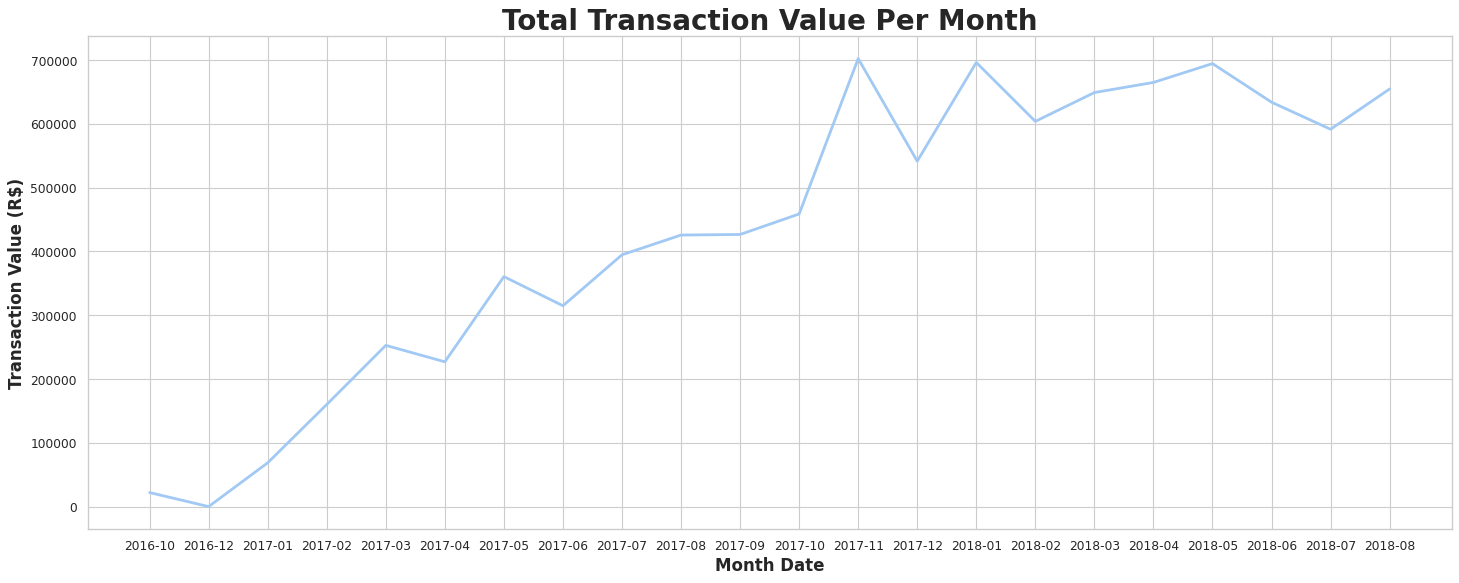

In [46]:
#Graph of transactions per month
sns.set_theme(style="whitegrid", palette="pastel")
f, ax = plt.subplots(figsize=(22, 8),dpi=80)
sns.lineplot(x="month", y=grouped_month1['sum'], data=grouped_month1, linewidth=2.5)
ax.set_title("Total Transaction Value Per Month", fontsize=25, fontweight='bold', position=(0.5,1.05))
ax.set_ylabel("Transaction Value (R$)",fontsize=15, fontweight='bold', position=(-0.1,0.5))
ax.set_xlabel("Month Date",fontsize=15, fontweight='bold', position=(0.5,-0.3))

**Insight:**
* Total Transaction Value Per Month --> positive trend
* Similar to the trend in the number of orders, the highest transaction value was in November 2017, namely R$ 694,552.26.

##4. Daily Orders Trend

In [47]:
#Separated 2017 & 2018
df_daily = df.copy()
df_daily['year'] = df_daily['order_purchase_timestamp'].dt.strftime('%Y')
df_daily = df_daily[df_daily['year']!='2016']
df_daily['week'] = df_daily['order_purchase_timestamp'].dt.strftime('%U')
df_daily['day'] = df_daily['order_purchase_timestamp'].dt.strftime('%w - %a')
df_17 = pd.pivot_table(df_daily[df_daily['year']=='2017'], values='order_id', index='week',
                       columns='day', aggfunc={'order_id': 'count'})
df_18 = pd.pivot_table(df_daily[df_daily['year']=='2018'], values='order_id', index='week',
                       columns='day', aggfunc={'order_id': 'count'})

Text(0.0, 1.0, '2018')

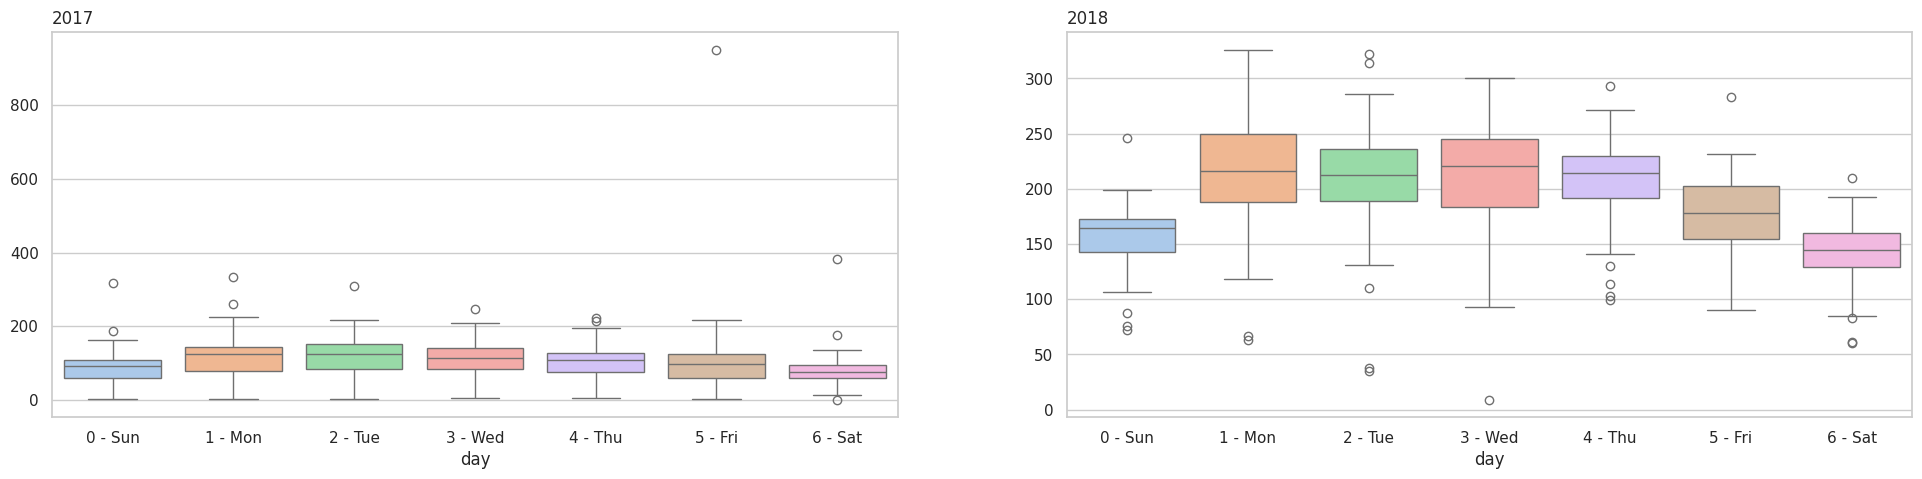

In [48]:
#Daily order outlier graph 2017 & 2018
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(24, 5))
sns.boxplot(data=df_17, ax=axs[0])
sns.boxplot(data=df_18, ax=axs[1])
axs[0].set_title("2017", loc='left')
axs[1].set_title("2018", loc='left')

Text(0.0, 1.0, 'Daily orders trend 2018')

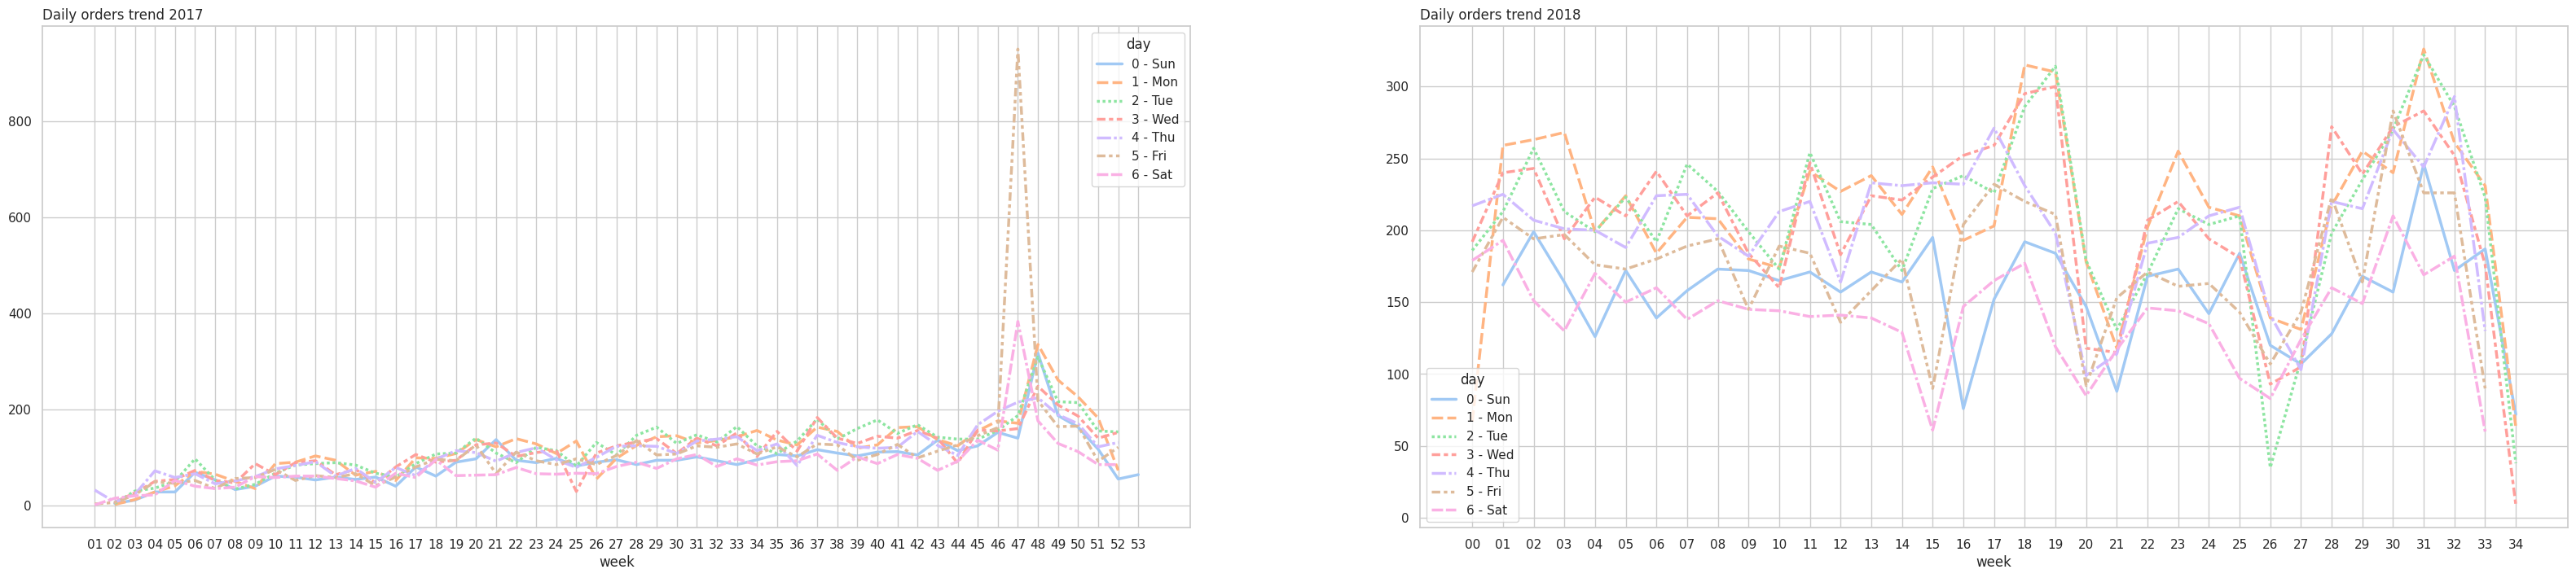

In [49]:
#Weekly daily orders trend chart 2017 & 2018
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(40, 8),dpi=100)
sns.lineplot(data=df_17, lw=2.5, ax=axs[0])
sns.lineplot(data=df_18, lw=2.5, ax=axs[1])
axs[0].set_title("Daily orders trend 2017", loc='left')
axs[1].set_title("Daily orders trend 2018", loc='left')

Text(0.0, 1.0, 'Daily orders trend 2018')

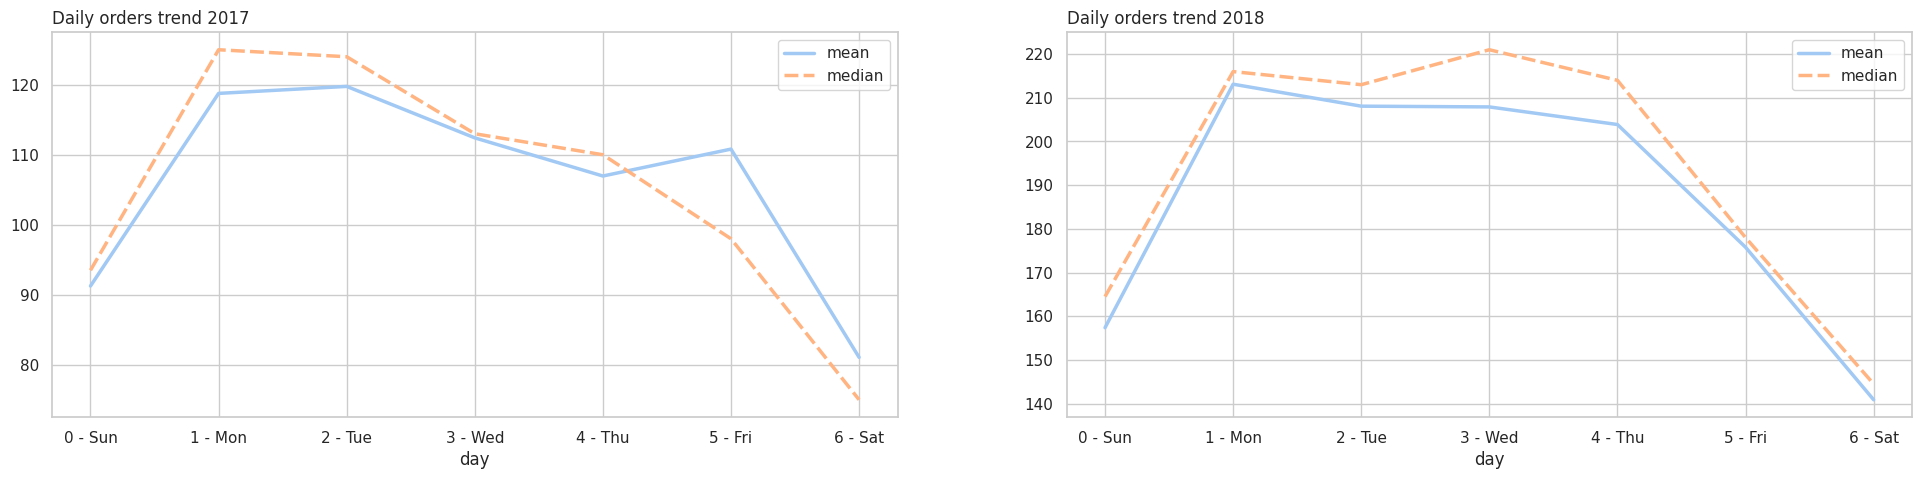

In [50]:
#Daily order average graph 2017 & 2018
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(24, 5))
sns.lineplot(data=(df_17.agg(['mean', 'median'])).T, lw=2.5, ax=axs[0])
sns.lineplot(data=(df_18.agg(['mean', 'median'])).T, lw=2.5, ax=axs[1])
axs[0].set_title("Daily orders trend 2017", loc='left')
axs[1].set_title("Daily orders trend 2018", loc='left')

In [51]:
#Combined 2017 & 2018
df_comb = df_daily.groupby(by=['year', 'week', 'day'])
df_comb = df_comb['order_id'].agg('count')
df_comb = pd.DataFrame(df_comb)
df_comb = df_comb.reset_index()
cond = df_comb['year'] == '2018'
i = 0
for c in cond:
  if c:
    temp = int(df_comb['week'][i]) + 53
    df_comb['week'][i] = str(temp)
  i += 1
df_comb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      602 non-null    object
 1   week      602 non-null    object
 2   day       602 non-null    object
 3   order_id  602 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.9+ KB


<Axes: xlabel='day', ylabel='order_id'>

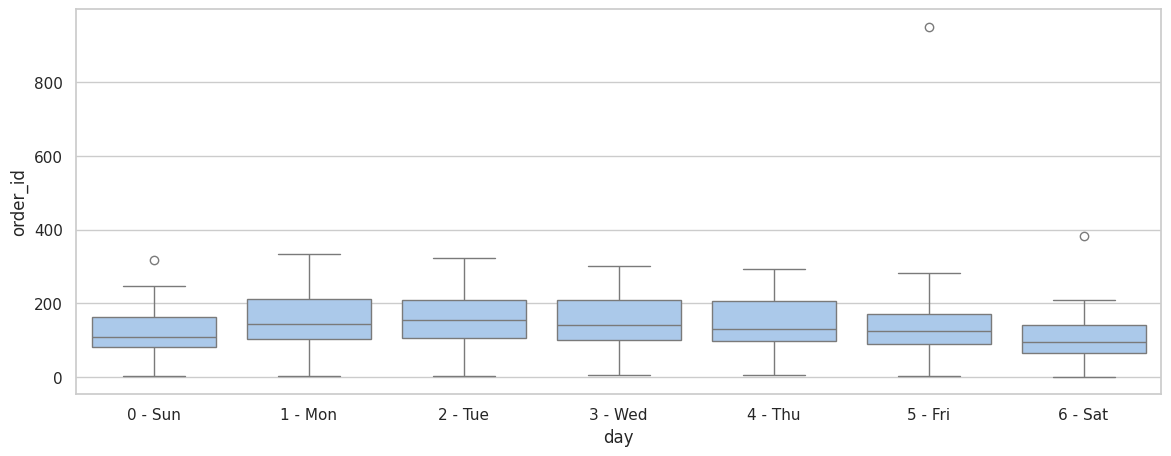

In [52]:
#Daily order outlier graph 2017 - 2018
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 1, figsize=(14, 5))
sns.boxplot(data=df_comb.sort_values(by='day'), x='day', y='order_id')

<Axes: xlabel='week', ylabel='order_id'>

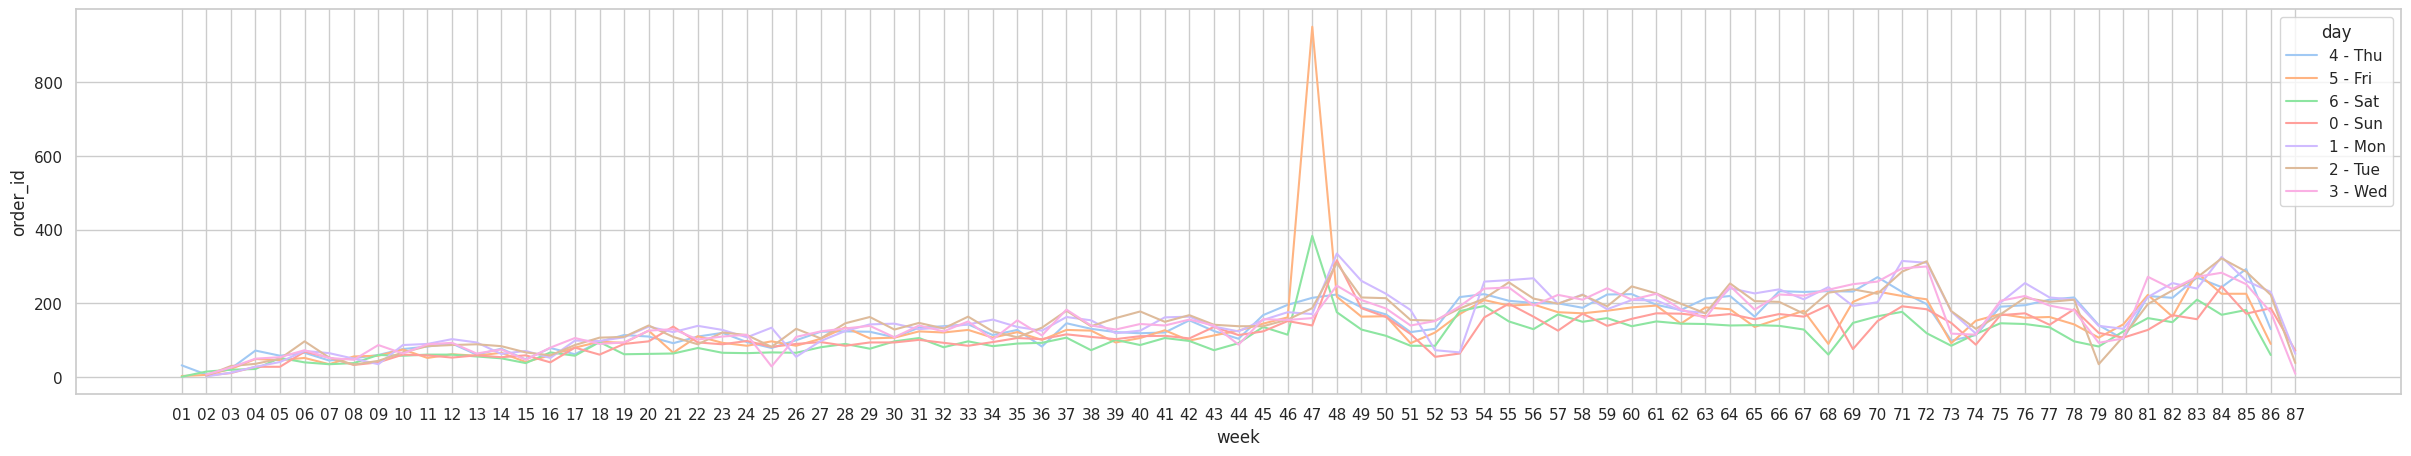

In [53]:
#2017 - 2018 weekly daily orders trend graph with outliers
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 1, figsize=(30, 5),dpi=100)
sns.lineplot(data=df_comb.sort_values(by='week'), x='week', y='order_id', hue='day')

<Axes: xlabel='day', ylabel='order_id'>

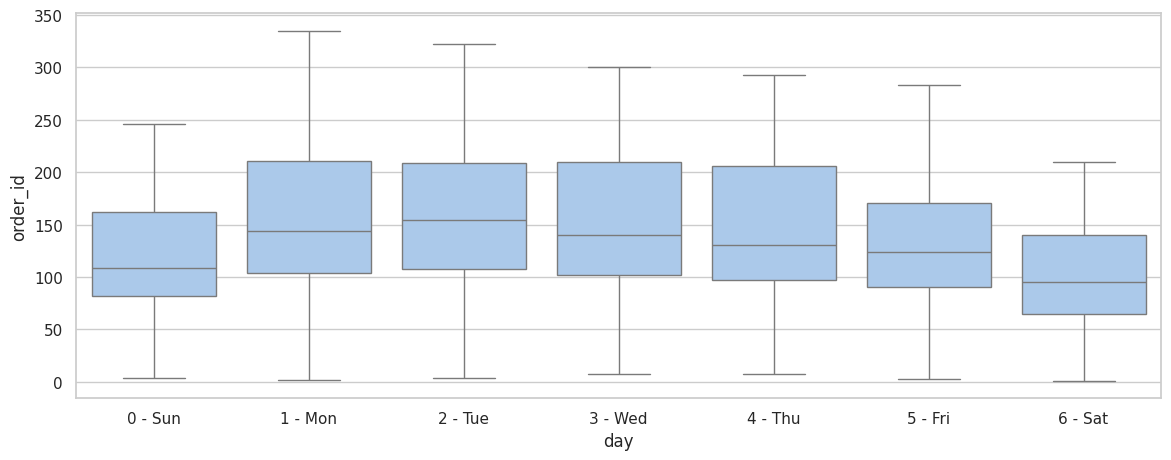

In [54]:
#Remove outlier data
df_comb = df_comb[~((df_comb['day']=='0 - Sun') & (df_comb['order_id']>300))]
df_comb = df_comb[~((df_comb['day']=='6 - Sat') & (df_comb['order_id']>300))]
df_comb = df_comb[~((df_comb['day']=='5 - Fri') & (df_comb['order_id']>800))]
f, axs = plt.subplots(1, 1, figsize=(14, 5))
sns.boxplot(data=df_comb.sort_values(by='day'), x='day', y='order_id')

<Axes: xlabel='week', ylabel='order_id'>

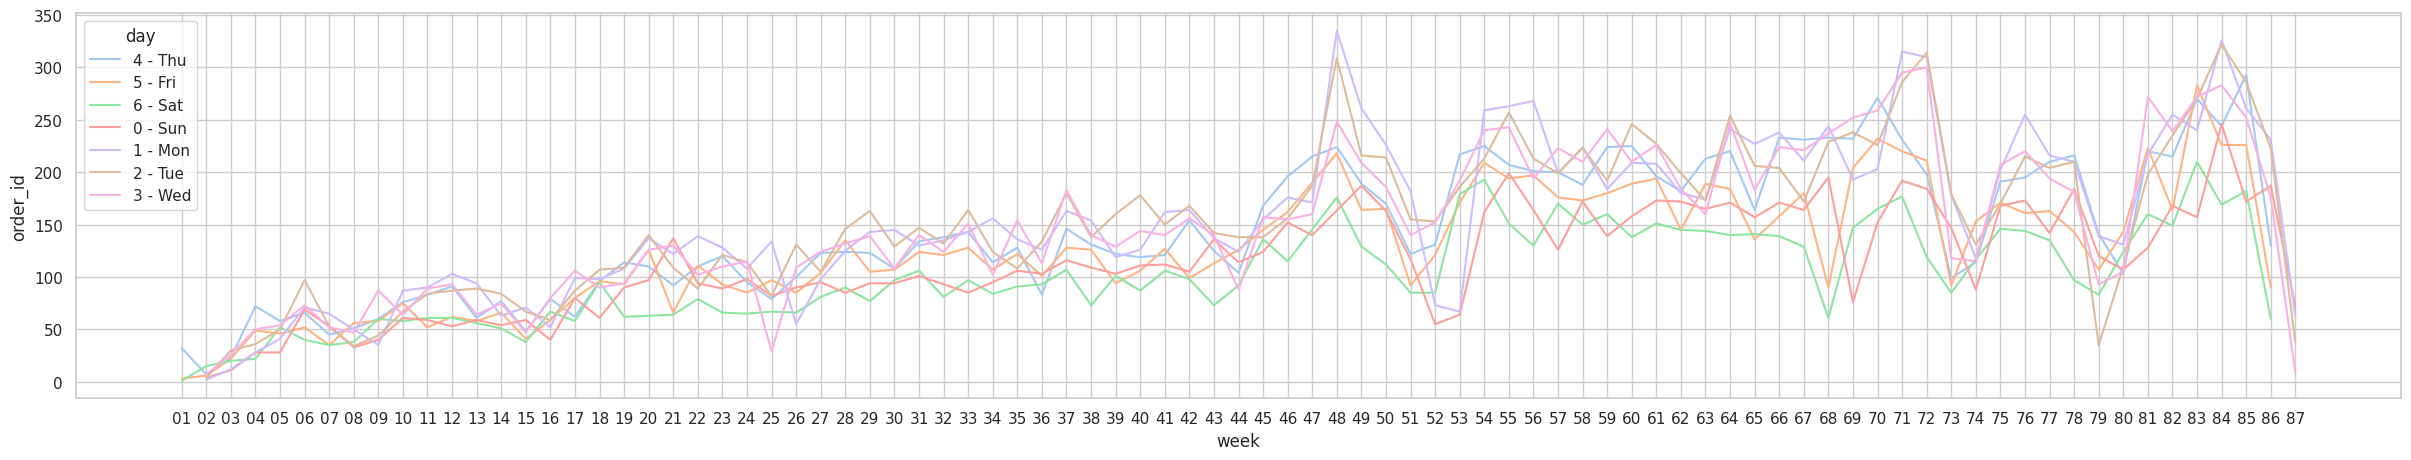

In [55]:
#Graph of weekly daily order trends in 2017 - 2018
f, axs = plt.subplots(1, 1, figsize=(30, 5),dpi=100)
sns.lineplot(data=df_comb.sort_values(by='week'), x='week', y='order_id', hue='day')

In [56]:
#Average daily orders 2017 - 2018
temp = df_comb.groupby('day').agg(['mean', 'median'])['order_id']
temp

,mean,median
day,,
0 - Sun,115.047059,109.0
1 - Mon,157.162791,144.0
2 - Tue,155.709302,154.0
3 - Wed,151.279070,140.0
4 - Thu,145.279070,130.5
5 - Fri,126.929412,124.0
6 - Sat,101.435294,95.0


[Text(0.5, 1.0, 'Average daily orders in a week'),
 Text(0, 0.5, 'Number of orders')]

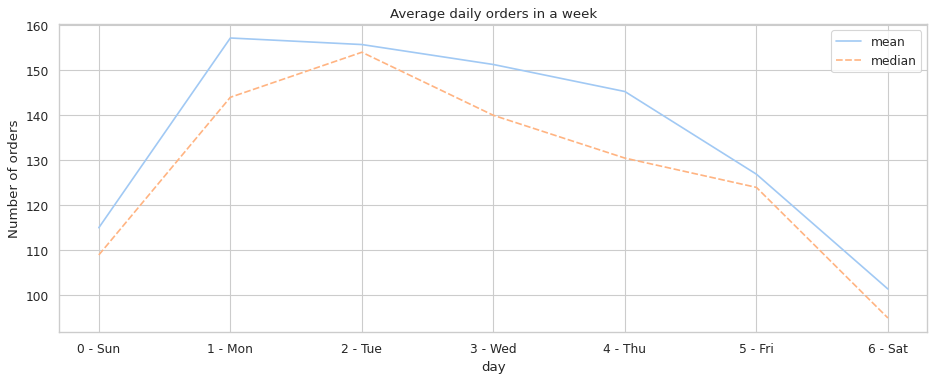

In [57]:
#Graph of average daily orders 2017 - 2018
f, axs = plt.subplots(1, 1, figsize=(14, 5),dpi=80)
sns.lineplot(data=temp)
axs.set(title="Average daily orders in a week", ylabel="Number of orders")

**Insight:**
* There's sudden peak of orders on Friday week 47th, it happened on 24 November 2017 which was a Black Friday (marks the start of the Christmas shopping season, stores offer highly promoted sales).
* The busiest day of the week is on Monday (based on average daily orders) with average 157 orders/day.

**Recommendation:**
* Each year, the peak of promotion should be done on Black Friday
* While for normal days in a week, it's preferable to do promotion on Monday-Tuesday

##5. Percentage of Orders Per Payment Type

In [58]:
#Calculates percentage of orders per payment type
col_pay = (df.columns.tolist())[8:]
df_pt = df[col_pay].sum()
df_pt = pd.DataFrame(df_pt).reset_index()
df_pt = df_pt.rename(columns={'index': 'payment_type', 0: 'count'})
df_pt['payment_type'] = df_pt['payment_type'].str.replace("payment_type_", "")
df_pt['percentage'] = round(100*df_pt['count']/df_pt['count'].sum(), 2)
df_pt

,payment_type,count,percentage
0,boleto,16868,19.36
1,credit_card,64072,73.54
2,debit_card,1322,1.52
3,voucher,4865,5.58


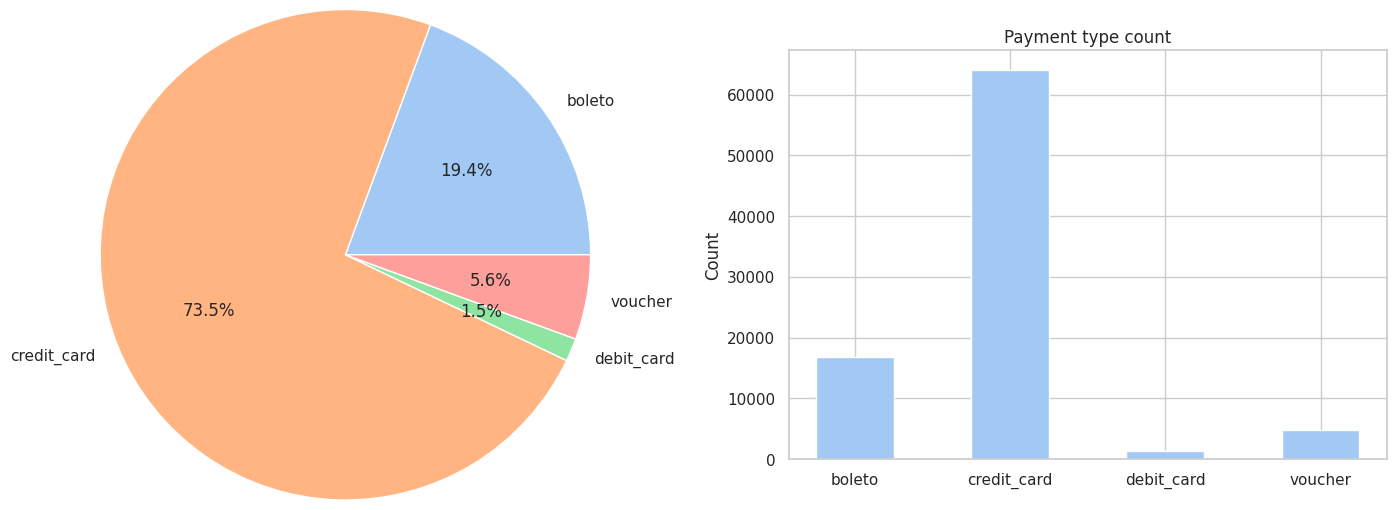

In [59]:
#Graph of order percentage per payment type
sns.set_theme(style="whitegrid", palette="pastel")
f, axs = plt.subplots(1, 2, figsize=(14, 5),dpi=100, constrained_layout=True)
axs[0].pie(data=df_pt, x='count', labels='payment_type', autopct='%1.1f%%', radius=1.5)
axs[1].bar(df_pt['payment_type'], df_pt['count'], width=0.5)
axs[1].set(title="Payment type count", ylabel="Count")
plt.show()

**Insight:**
* Most of the customer use credit card as their payment method (73.5%)
* Few customer use debit card (1.5%)

**Recommendation:**
* Cooperate or affiliate with more credit card providers

##6. Customer State

In [60]:
#Create a state aggregation table
bar_states = df.groupby('customer_state')['order_id'].agg([
              'count']).reset_index().sort_values(by='count', ascending=True)


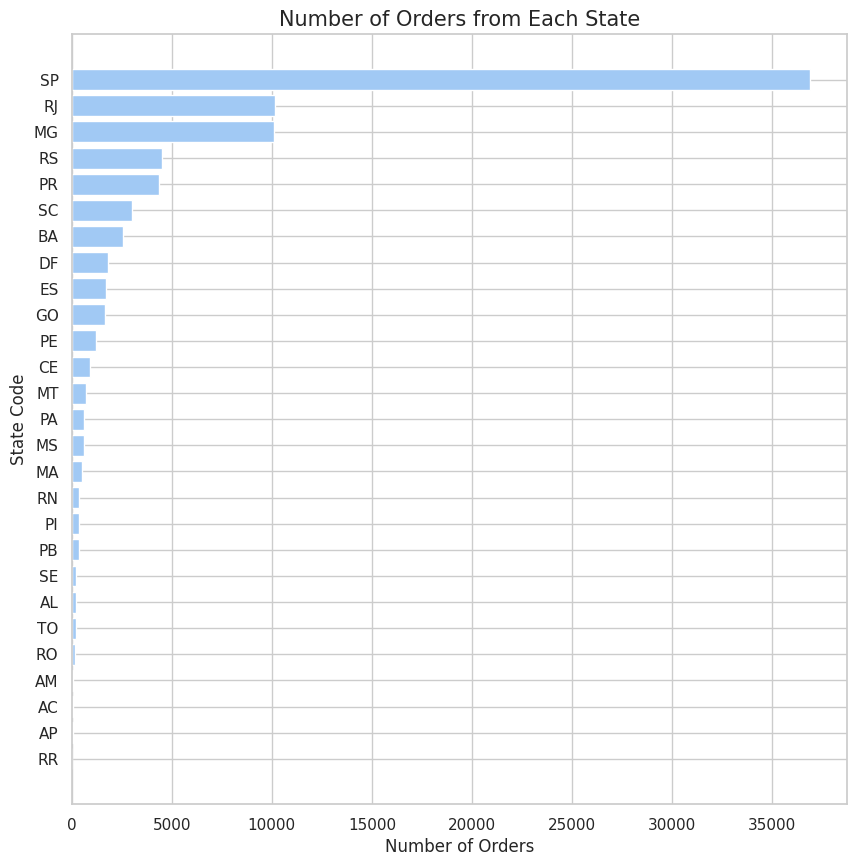

In [61]:
#Visualization of the number of orders in each state
plt.figure(figsize=(10,10))
plt.barh(bar_states['customer_state'], bar_states['count'])
plt.xlabel('Number of Orders')
plt.ylabel('State Code')
plt.title('Number of Orders from Each State', size = 15)
plt.show()

**Insight:**
* From the graph above, it can be seen that the largest number of orders comes from the state of Sao Paulo (SP). This reached 42% of all transactions. This shows that there are still many opportunities to increase transactions from other states.

**Recommendation:**
* carry out promotions and awareness about olist stores in states that have a small number of orders. Then carry out remarketing to customers from Sao Paulo so that they remain loyal and want to make repeat purchases.

# Customer Segmentation

##1. Calculation of Recency, Frequency, & Monetary Value

###Recency

In [62]:
df_r = df.groupby(by='customer_id', as_index=False)['order_purchase_timestamp'].max()
df_r.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'}, inplace=True)
df_r['LastPurchaseDate'] = df_r['LastPurchaseDate'].dt.date

In [63]:
#Calculate recency
recent_date = df['order_purchase_timestamp'].dt.date.max()
df_r['Recency'] = df_r['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

In [64]:
#Display recency
display(df_r.head(), df_r['Recency'].describe())

,customer_id,LastPurchaseDate,Recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,288
1,000161a058600d5901f007fab4c27140,2017-07-16,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,378
4,000379cdec625522490c315e70c7a9fb,2018-04-02,149


count    83444.000000
mean       241.015160
std        153.673379
min          0.000000
25%        114.000000
50%        224.000000
75%        353.000000
max        695.000000
Name: Recency, dtype: float64

<Axes: title={'center': 'Distribution of Recency'}, xlabel='Recency', ylabel='Count'>

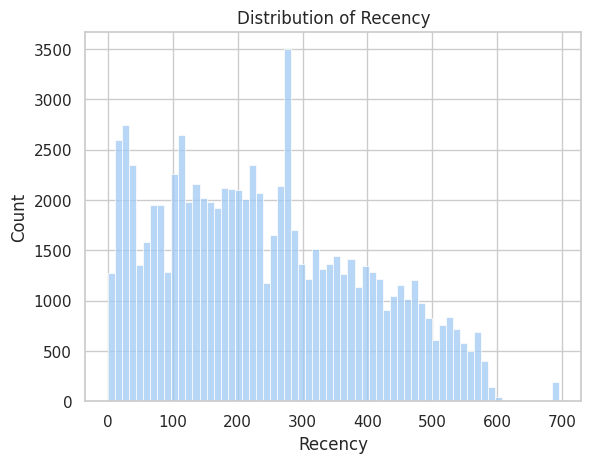

In [65]:
#Recency chart
plt.title('Distribution of Recency')
sns.histplot(data=df_r, x='Recency')

###Frequency

In [66]:
#Calculate frequency
df_f = df.groupby(['customer_id']).agg({'order_id':'nunique'}).reset_index()
df_f.rename(columns={'order_id':'Frequency'}, inplace=True)

In [67]:
#Display frequency
display(df_f.head(), df_f['Frequency'].describe())

,customer_id,Frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


count    83444.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Frequency, dtype: float64

<Axes: title={'center': 'Distribution of Frequency'}, xlabel='Frequency', ylabel='Count'>

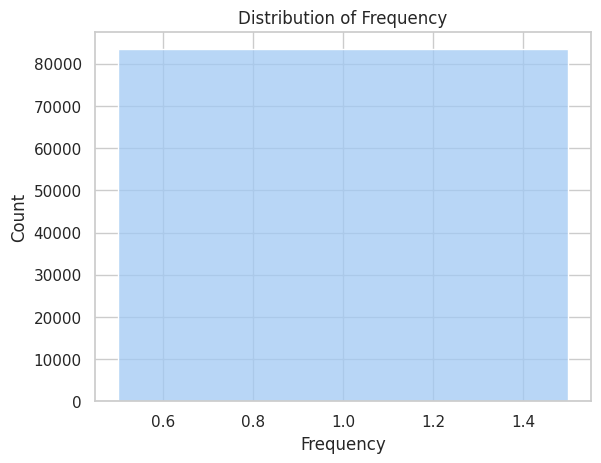

In [68]:
#Frequency chart
plt.title('Distribution of Frequency')
sns.histplot(data=df_f, x='Frequency')

###Monetary

In [69]:
#Calculate monetary
df_m = df.groupby('customer_id', as_index=False)['payment_value'].sum()
df_m.columns = ['customer_id', 'Monetary']

In [70]:
#Display monetary
display(df_m.head(), df_m['Monetary'].describe())

,customer_id,Monetary
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


count    83444.000000
mean       114.395638
std         72.113575
min          9.590000
25%         58.130000
50%         96.430000
75%        154.585000
max        349.400000
Name: Monetary, dtype: float64

<Axes: title={'center': 'Distribution of Monetary'}, xlabel='Monetary', ylabel='Count'>

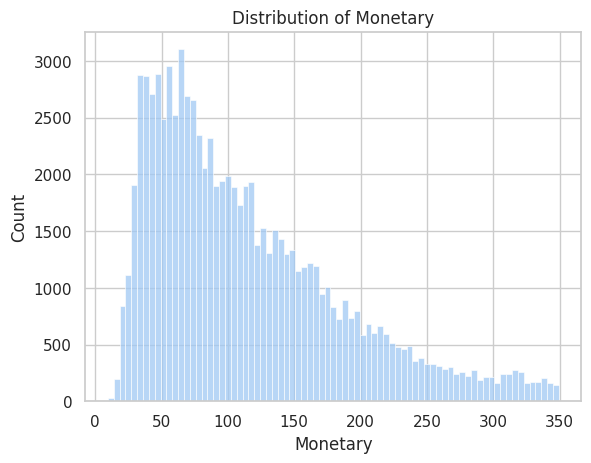

In [71]:
#Monetary chart
plt.title('Distribution of Monetary')
sns.histplot(data=df_m[df_m['Monetary']<5000], x='Monetary')

In [72]:
#Merge data for RFM
df_rf = df_r.merge(df_f, on='customer_id')
df_rfm = df_rf.merge(df_m, on='customer_id').drop(columns='LastPurchaseDate')
df_rfm.head()

,customer_id,Recency,Frequency,Monetary
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35
4,000379cdec625522490c315e70c7a9fb,149,1,107.01


###Provides RFM score

Next, we will provide Recency, Frequency, and Monetary scores as follows:

1. Recency is divided into 3 score categories (1-3) based on quantile.
2. Frequency is divided into 2 score categories where:
  - score 1 = frequency 1 time (meaning the customer does not make repeat purchases at all)
  - score 2 = frequency > 1 time (meaning the customer has made repeat purchases)

1. Recency is divided into 3 score categories (1-3) based on quantile.

In [73]:
#Divided into 3 score categories
df_rfm['R_score'] = pd.qcut(df_rfm['Recency'], 3, labels=[1, 2, 3]).astype(str)
df_rfm['F_score'] = df_rfm['Frequency'].apply(lambda x: '1' if x==1 else '2')
df_rfm['M_score'] = pd.qcut(df_rfm['Monetary'], 3, labels=[1, 2, 3]).astype(str)

In [74]:
#Count RFM score
df_rfm['RFM_score'] = df_rfm['R_score'] + df_rfm['F_score'] + df_rfm['M_score']

In [75]:
#Display RFM
df_rfm.head()

,customer_id,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,288,1,114.74,2,1,2,212
1,000161a058600d5901f007fab4c27140,409,1,67.41,3,1,1,311
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,3,1,3,313
3,0002414f95344307404f0ace7a26f1d5,378,1,179.35,3,1,3,313
4,000379cdec625522490c315e70c7a9fb,149,1,107.01,1,1,2,112


In [76]:
#RFM score
df_rfm['RFM_score'].value_counts()

312    9640
113    9626
211    9572
213    9269
311    9241
112    9235
111    9015
212    8930
313    8916
Name: RFM_score, dtype: int64

Determine the RFM Segment/Group based on the RFM score value that has been obtained.

In [77]:
#Create a function to determine the RFM Segment
def segment(x):
    if x == '123' :
        return 'Champions'
    elif x in ['111', '112', '113'] :
        return 'Recent Users'
    elif x in ['211', '212', '213', '221', '222', '223'] :
        return "Can't Lose Them"
    elif x in ['121', '122'] :
        return 'Loyal Customers'
    elif x in ['321', '322', '323'] :
        return 'About to Sleep'
    else:
        return 'Lost Customers'

In [78]:
df_rfm['segments'] = df_rfm['RFM_score'].apply(segment)

In [79]:
#RFM Segment/Group based on RFM score value
df_rfm.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Can't Lose Them,224.935040,1.0,113.523846,27771
Lost Customers,422.505126,1.0,113.429109,27797
Recent Users,76.059083,1.0,116.227936,27876


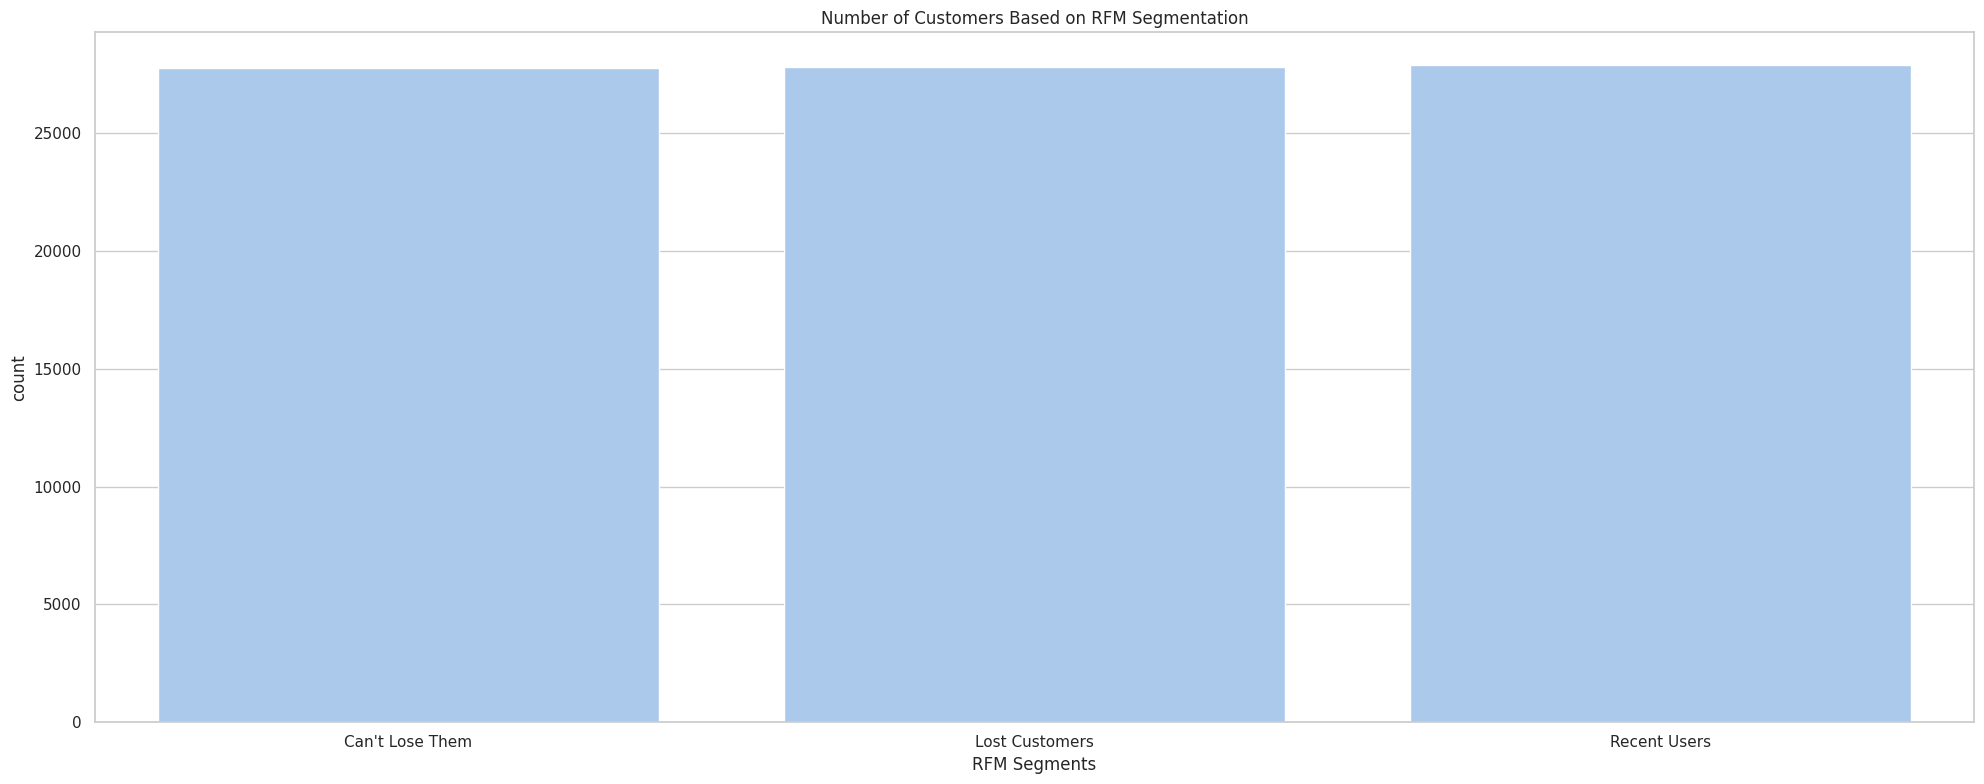

In [80]:
#RFM chart
plt.figure(figsize=(20,8))
sns.countplot(data=df_rfm, x='segments')
plt.xlabel('RFM Segments', size = 12)
plt.title('Number of Customers Based on RFM Segmentation')
plt.tight_layout()
plt.show();

**Insight:**

Based on the RFM segmentation that has been carried out, 6 segments were obtained with 3 segments that are dominant in number, namely Recent Users, Lost Customers, and Can't Lose Them, while the other 3 segments, namely Loyal Customers, About to Sleep, and Champions, there are no numbers.

**Recommendation:**

Here are some recommendations that can be carried out through marketing activities:

1. Recent Users

  If we look at historical data, Olist Ecommerce is having difficulty retaining its customers (as evidenced by the transaction frequency of the majority of unique customers being only 1x). The Recent Users segment will be a good potential for Olist Ecommerce where customers have just made transactions at Olist Ecommerce. Olist Ecommerce needs to maintain its relationship with this Recent Users segment. Some recommendations for this segment are:
  * Create a notification aimed at this segment.
  * Provide recommendations for items that are similar to the items you have purchased.
  * Interacting with Users such as giving Happy Eid greetings or something else.
  * Offer loyalty programs to consumers.

2. Lost Customers

  This segment is customer churn. To get these customers back requires more effort. Some recommendations for the Lost Customers segment are:
  * Providing special promotions during certain periods to attract back this Lost Customers segment, for example by giving discount vouchers during Eid, delivery fee vouchers, etc.
  * Provide a notification containing the last purchase made so that it reminds you of the customer journey at Olist Ecommerce.

3. Can't Lose Them

  This segment needs to be monitored and given special treatment to be able to maintain it. Some recommendations for this segment are:
  * Providing special, personalized promotions to this segment.
  * Provide recommendations for items that are similar to items that have been purchased with more choices/variations.


##2. Clustering KMeans Using Combined Database and RFM

In [81]:
#Select the features that will be used for clustering modeling
df_model = df[['order_id', 'customer_id', 'customer_state', 'payment_value',
               'payment_type_boleto', 'payment_type_credit_card',
               'payment_type_debit_card', 'payment_type_voucher']]

In [82]:
df_model = pd.get_dummies(df_model, columns=['customer_state', 'payment_type_boleto',
                                             'payment_type_credit_card',
                                             'payment_type_debit_card',
                                             'payment_type_voucher'])

In [83]:
#Look at the columns in the clustering modeling
df_model.columns

Index(['order_id', 'customer_id', 'payment_value', 'customer_state_AC',
       'customer_state_AL', 'customer_state_AM', 'customer_state_AP',
       'customer_state_BA', 'customer_state_CE', 'customer_state_DF',
       'customer_state_ES', 'customer_state_GO', 'customer_state_MA',
       'customer_state_MG', 'customer_state_MS', 'customer_state_MT',
       'customer_state_PA', 'customer_state_PB', 'customer_state_PE',
       'customer_state_PI', 'customer_state_PR', 'customer_state_RJ',
       'customer_state_RN', 'customer_state_RO', 'customer_state_RR',
       'customer_state_RS', 'customer_state_SC', 'customer_state_SE',
       'customer_state_SP', 'customer_state_TO', 'payment_type_boleto_0',
       'payment_type_boleto_1', 'payment_type_credit_card_0',
       'payment_type_credit_card_1', 'payment_type_credit_card_2',
       'payment_type_debit_card_0', 'payment_type_debit_card_1',
       'payment_type_debit_card_2', 'payment_type_voucher_0',
       'payment_type_voucher_1', 'paym

In [84]:
#Change the data content
df_model = df_model.groupby(['order_id', 'customer_id']).agg({'payment_value': np.sum, 'customer_state_AC': np.sum, 'customer_state_AL': np.sum,
                                                              'customer_state_AM': np.sum, 'customer_state_AP': np.sum, 'customer_state_BA': np.sum,
                                                              'customer_state_CE': np.sum, 'customer_state_DF': np.sum, 'customer_state_ES': np.sum,
                                                              'customer_state_GO': np.sum, 'customer_state_MA': np.sum, 'customer_state_MG': np.sum,
                                                              'customer_state_MS': np.sum, 'customer_state_MT': np.sum, 'customer_state_PA': np.sum,
                                                              'customer_state_PB': np.sum, 'customer_state_PE': np.sum, 'customer_state_PI': np.sum,
                                                              'customer_state_PR': np.sum, 'customer_state_RJ': np.sum, 'customer_state_RN': np.sum,
                                                              'customer_state_RO': np.sum, 'customer_state_RR': np.sum, 'customer_state_RS': np.sum,
                                                              'customer_state_SC': np.sum, 'customer_state_SE': np.sum, 'customer_state_SP': np.sum,
                                                              'customer_state_TO': np.sum, 'payment_type_boleto_0': np.sum, 'payment_type_boleto_1': np.sum,
                                                              'payment_type_credit_card_0': np.sum, 'payment_type_credit_card_1': np.sum,
                                                              'payment_type_credit_card_2': np.sum, 'payment_type_debit_card_0': np.sum,
                                                              'payment_type_debit_card_1': np.sum, 'payment_type_debit_card_2': np.sum,
                                                              'payment_type_voucher_0': np.sum, 'payment_type_voucher_1': np.sum,
                                                              'payment_type_voucher_2': np.sum, 'payment_type_voucher_3': np.sum,
                                                              'payment_type_voucher_4': np.sum, 'payment_type_voucher_5': np.sum,
                                                              'payment_type_voucher_6': np.sum, 'payment_type_voucher_7': np.sum,
                                                              'payment_type_voucher_8': np.sum, 'payment_type_voucher_9': np.sum,
                                                              'payment_type_voucher_10': np.sum, 'payment_type_voucher_11': np.sum,
                                                              'payment_type_voucher_12': np.sum, 'payment_type_voucher_13': np.sum,
                                                              'payment_type_voucher_14': np.sum, 'payment_type_voucher_15': np.sum,
                                                              'payment_type_voucher_18': np.sum, 'payment_type_voucher_21': np.sum,
                                                              'payment_type_voucher_25': np.sum }).reset_index()

In [85]:
#Change the data content
df_model = df_model.groupby(['customer_id']).agg({'payment_value': np.sum, 'customer_state_AC': np.max, 'customer_state_AL': np.max,
                                                              'customer_state_AM': np.max, 'customer_state_AP': np.max, 'customer_state_BA': np.max,
                                                              'customer_state_CE': np.max, 'customer_state_DF': np.max, 'customer_state_ES': np.max,
                                                              'customer_state_GO': np.max, 'customer_state_MA': np.max, 'customer_state_MG': np.max,
                                                              'customer_state_MS': np.max, 'customer_state_MT': np.max, 'customer_state_PA': np.max,
                                                              'customer_state_PB': np.max, 'customer_state_PE': np.max, 'customer_state_PI': np.max,
                                                              'customer_state_PR': np.max, 'customer_state_RJ': np.max, 'customer_state_RN': np.max,
                                                              'customer_state_RO': np.max, 'customer_state_RR': np.max, 'customer_state_RS': np.max,
                                                              'customer_state_SC': np.max, 'customer_state_SE': np.max, 'customer_state_SP': np.max,
                                                              'customer_state_TO': np.max, 'payment_type_boleto_0': np.sum, 'payment_type_boleto_1': np.sum,
                                                              'payment_type_credit_card_0': np.sum, 'payment_type_credit_card_1': np.sum,
                                                              'payment_type_credit_card_2': np.sum, 'payment_type_debit_card_0': np.sum,
                                                              'payment_type_debit_card_1': np.sum, 'payment_type_debit_card_2': np.sum,
                                                              'payment_type_voucher_0': np.sum, 'payment_type_voucher_1': np.sum,
                                                              'payment_type_voucher_2': np.sum, 'payment_type_voucher_3': np.sum,
                                                              'payment_type_voucher_4': np.sum, 'payment_type_voucher_5': np.sum,
                                                              'payment_type_voucher_6': np.sum, 'payment_type_voucher_7': np.sum,
                                                              'payment_type_voucher_8': np.sum, 'payment_type_voucher_9': np.sum,
                                                              'payment_type_voucher_10': np.sum, 'payment_type_voucher_11': np.sum,
                                                              'payment_type_voucher_12': np.sum, 'payment_type_voucher_13': np.sum,
                                                              'payment_type_voucher_14': np.sum, 'payment_type_voucher_15': np.sum,
                                                              'payment_type_voucher_18': np.sum, 'payment_type_voucher_21': np.sum,
                                                              'payment_type_voucher_25': np.sum }).reset_index()

In [86]:
df_model.head()

,customer_id,payment_value,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,...,payment_type_voucher_9,payment_type_voucher_10,payment_type_voucher_11,payment_type_voucher_12,payment_type_voucher_13,payment_type_voucher_14,payment_type_voucher_15,payment_type_voucher_18,payment_type_voucher_21,payment_type_voucher_25
0,00012a2ce6f8dcda20d059ce98491703,114.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,000161a058600d5901f007fab4c27140,67.41,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0001fd6190edaaf884bcaf3d49edf079,195.42,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0002414f95344307404f0ace7a26f1d5,179.35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,000379cdec625522490c315e70c7a9fb,107.01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#Combine database & RFM
df_model = pd.merge(df_model, df_rfm, on='customer_id', how='left')

In [88]:
#View the resulting dataframe for clustering
df_model.head()

,customer_id,payment_value,customer_state_AC,customer_state_AL,customer_state_AM,customer_state_AP,customer_state_BA,customer_state_CE,customer_state_DF,customer_state_ES,...,payment_type_voucher_21,payment_type_voucher_25,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,segments
0,00012a2ce6f8dcda20d059ce98491703,114.74,0,0,0,0,0,0,0,0,...,0,0,288,1,114.74,2,1,2,212,Can't Lose Them
1,000161a058600d5901f007fab4c27140,67.41,0,0,0,0,0,0,0,0,...,0,0,409,1,67.41,3,1,1,311,Lost Customers
2,0001fd6190edaaf884bcaf3d49edf079,195.42,0,0,0,0,0,0,0,1,...,0,0,547,1,195.42,3,1,3,313,Lost Customers
3,0002414f95344307404f0ace7a26f1d5,179.35,0,0,0,0,0,0,0,0,...,0,0,378,1,179.35,3,1,3,313,Lost Customers
4,000379cdec625522490c315e70c7a9fb,107.01,0,0,0,0,0,0,0,0,...,0,0,149,1,107.01,1,1,2,112,Recent Users


In [89]:
#Delete a column
X = df_model.drop(['customer_id', 'payment_value', 'Frequency','R_score', 'F_score', 'M_score', 'RFM_score', 'segments'], axis=1)

###Scaling

Because the data has outliers, scaling will be carried out using Robust Scaler.
As written in the following article, Robust Scaler uses median and IQR for scaling, so it is more resistant to outliers.

In [90]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [91]:
pca=PCA(n_components=2)
pipeline=Pipeline([
    ('preprocess',scaler),
    ('PCA',pca)
])

In [92]:
X_pca=pipeline.fit_transform(X)

In [93]:
variance=[]

for i in range(2):
    variance.append(np.var(X_pca[:,i]))
print('information stored in the first 2 components',round(sum(variance[:2])/sum(variance)*100,2),'%')

information stored in the first 2 components 100.0 %


In [94]:
X_pca=pd.DataFrame(X_pca, columns=['first component','second component'])
X_pca.head()

,first component,second component
0,-0.383344,-0.229089
1,-0.210944,-0.535065
2,-0.651130,0.675277
3,1.227295,1.255766
4,1.475797,0.413590


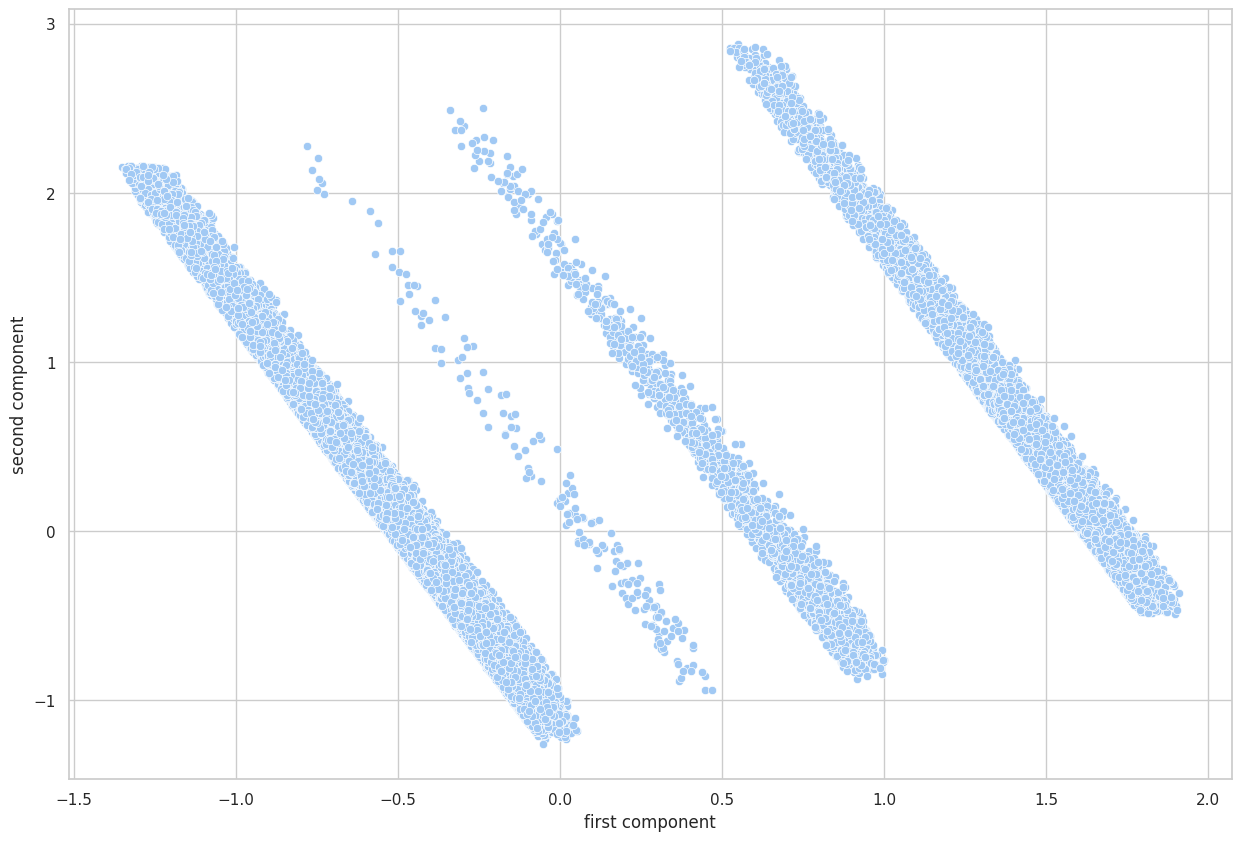

In [95]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='first component',y='second component', data=X_pca)
plt.show()

###KMeans and Silhouette score

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [97]:
#KMeans
k = range(2, 8)
inertia = []

for i in k:
    model_elbow = KMeans(n_clusters = i)
    model_elbow.fit(X_pca)
    inertia.append(model_elbow.inertia_)

print(k)
print(inertia)

range(2, 8)
[49106.30032648273, 23177.225939608084, 16677.111199524974, 10740.225057183387, 8508.957283912903, 6757.503072646206]


Text(0, 0.5, 'Inertia Sum Squared Error')

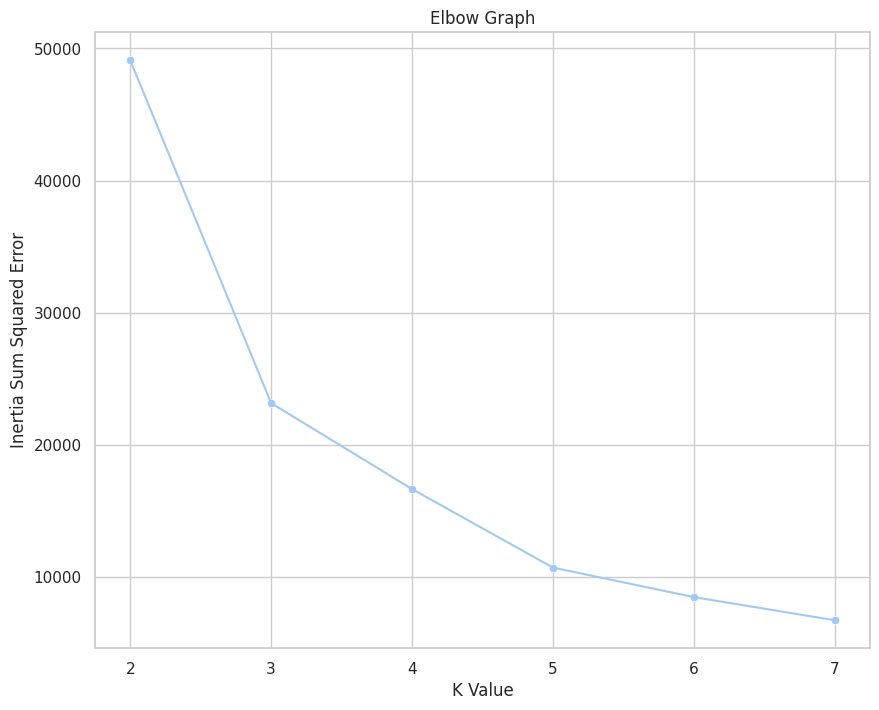

In [98]:
#Elbow graph
plt.figure(figsize=(10,8))
plt.plot(k, inertia)
sns.scatterplot(x=k, y = inertia)
plt.title('Elbow Graph')
plt.xlabel('K Value')
plt.ylabel('Inertia Sum Squared Error')

In [99]:
#Silhouette score
score=[]
k_num= range(2,8)
best=0

for i in k_num:
    kmean=KMeans(n_clusters=i)
    kmean.fit(X_pca)
    labels=kmean.labels_
    sil_score=(silhouette_score(X_pca,labels,metric='euclidean'))
    score.append(sil_score)

    if best<sil_score:
        best=sil_score
        best_k=i

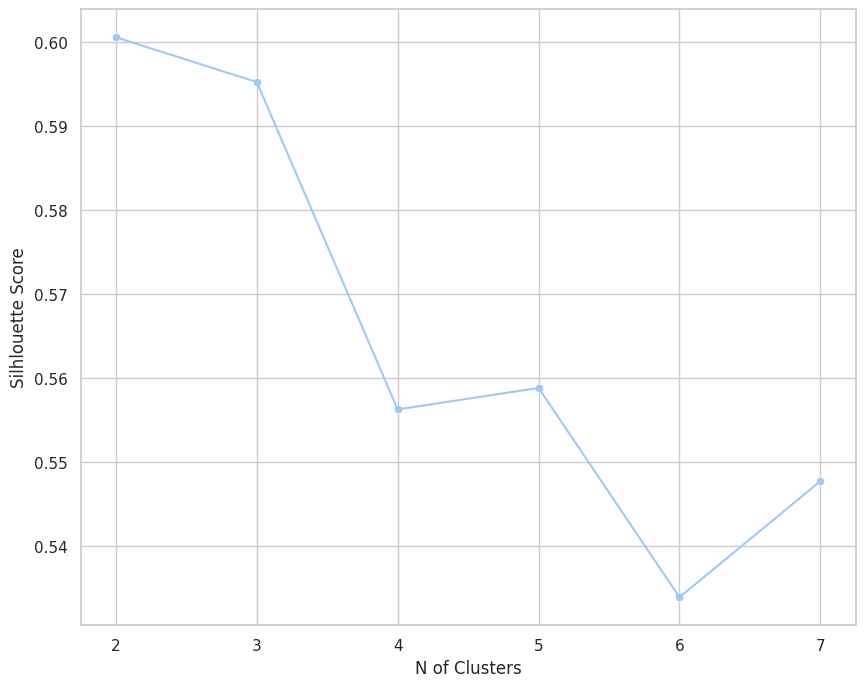

In [100]:
#Silhouette score graph
plt.figure(figsize=(10,8))
plt.plot(k_num,score)
sns.scatterplot(x=k, y = score)
plt.xticks(k_num)
plt.ylabel('Silhlouette Score')
plt.xlabel('N of Clusters')
plt.show()

**Insight:**

Based on the Silhouette value plot, K=2 is obtained with the best silhouette value. However, in the case of Customer Segmentation, we need to choose a cluster number of more than 2 so that we can get more specific Customer Segmentation and specific marketing activities too. Therefore, we choose the number of clusters equal to 3 clusters (K=3) because it has the second highest silhouette value. The elbow method results also support the silhouette score graph where the Inertia Sum Squared Error value starts to slope at K=3.

##3. Fitting Model

In [101]:
model = KMeans(n_clusters = 3, random_state=0)

model.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

In [102]:
X_pca['Cluster']=model.labels_

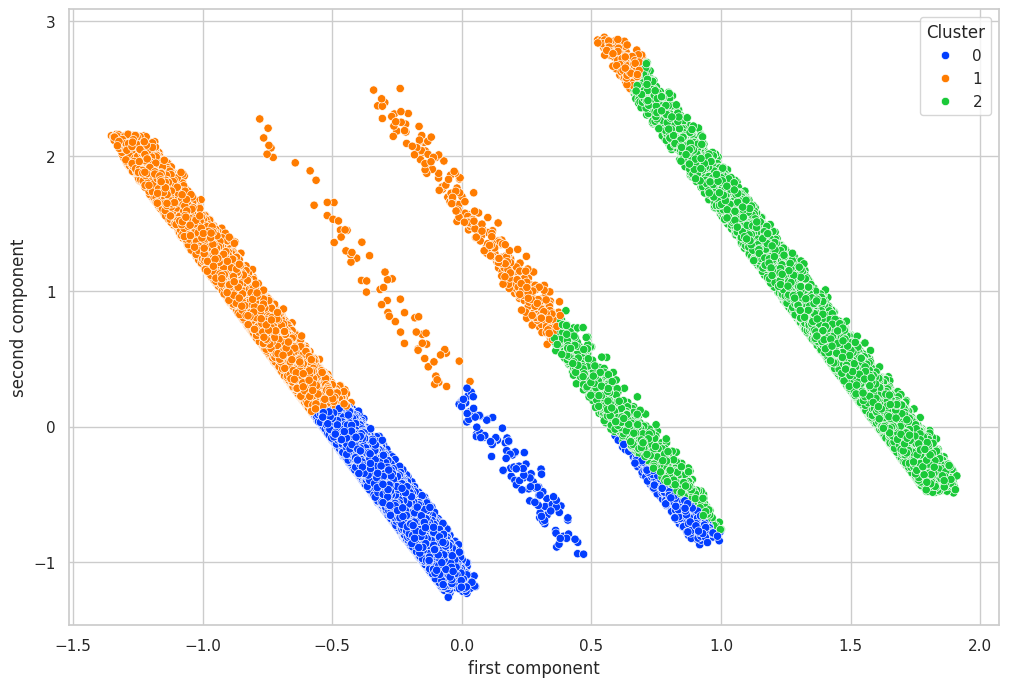

In [103]:
#Create a visualization of cluster distribution
plt.figure(figsize=(12,8))
sns.scatterplot(x='first component',y='second component', data=X_pca, hue = 'Cluster', palette = 'bright')
plt.title('')
plt.show()

,Cluster,count
0,0,45129
1,1,20020
2,2,18295


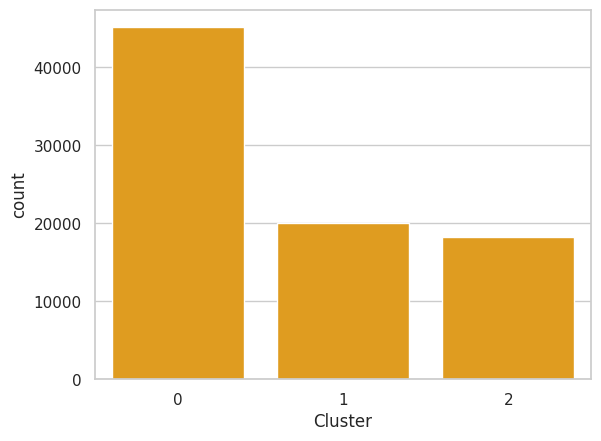

In [104]:
#Look at the number of each cluster
display(X_pca.groupby('Cluster')['Cluster'].agg(['count']).reset_index())

sns.countplot(data = X_pca, x='Cluster',color = 'orange')
plt.show()

In [105]:
#See the description of each cluster
X['Cluster'] = model.labels_
Xtranspose = X.groupby('Cluster').mean()
Xtranspose.T

Cluster,0,1,2
customer_state_AC,0.000377,0.001099,0.000765
customer_state_AL,0.002437,0.003896,0.002460
customer_state_AM,0.000997,0.001598,0.000547
customer_state_AP,0.000355,0.000749,0.000601
customer_state_BA,0.027322,0.038811,0.029571
customer_state_CE,0.009905,0.014236,0.009565
customer_state_DF,0.021051,0.025325,0.019951
customer_state_ES,0.019056,0.023726,0.020825
customer_state_GO,0.017838,0.022378,0.022793
customer_state_MA,0.004698,0.007792,0.008254


**Insight:**

  1. Cluster 0 (Low Spender)

  As previously explained, this cluster is the cluster with the largest number of consumers. This cluster has the smallest average spending seen from Monetary. The dominant Customer State is SP and the dominant payment type is Credit Card.

  2. Cluster 1 (Big Spender)
  
  This cluster has the largest average expenditure when viewed from a monetary perspective. The dominant customer country is SP. The dominant payment type is Credit Card. The Recency value of this cluster is in the middle of the other clusters.

  3. Cluster 2 (Medium Spender)

  This cluster has an average spending in the middle when viewed from Monetary, the dominant Customer State is SP and the dominant Payment type is Credit Card. The Recency value of this cluster is the highest of the three existing clusters.

**Recommendation:**

1. Cluster 0 (Low Spender)
  
  Based on the information that has been obtained, we provide recommendations for marketing activities as follows:
  * Increase credit card installment options with various banks.
  * Providing promotional vouchers for certain periods. For example, vouchers are valid only on certain National Days / Holidays.
  * Provide free vouchers/discount shipping costs.
  * Interact with Users such as giving Happy Holidays or something else.
  * Provide notifications containing the last purchases made so that they remind you about the customer journey at Olist Ecommerce.

2. Cluster 1 (Big Spender)

  Based on the information that has been obtained, we provide recommendations for marketing activities as follows:
  * Increase credit card installment options with various banks.
  * Increase the number of installment options.
  * Providing interest-free installment promos.
  * Providing special, personalized promos/vouchers to this segment.
  * Offer loyalty programs to consumers.
  
3. Cluster 2 (Medium Spender)

  Based on the information that has been obtained, we provide recommendations for marketing activities as follows:
  * Increase credit card installment options with various banks.
  * Create notifications to attract and remind customers of Olist Ecommerce.
  * Offer loyalty programs to consumers.
  * Interact with Users such as giving Happy Holidays or something else.

#**Recommendation**

Olist Ecommerce needs to pay more attention to retention from its old customers. Based on the segmentation of KMeans Clustering results, we also provide recommendations based on each Cluster as follows:

**Low Spender Cluster**

1. Increase credit card installment options with various banks.
2. Provide promotional vouchers for certain periods. For example, vouchers are valid only on certain National Days / Holidays.
3. Provide free vouchers/discount shipping costs.
4. Interact with Users such as giving Happy Holidays or something else.
5. Provide a notification containing the last purchase made so that it reminds you of the customer journey at Olist Ecommerce.

**Big Spender Cluster**

1. Increase credit card installment options with various banks
2. Increase the number of installment options
3. Providing interest-free installment promos
4. Give special promos/vouchers that are personal to this segment.
5. Offer a loyalty program to consumers

**Medium Spender Cluster**

1. Increase credit card installment options with various banks
2. Create notifications to attract and remind customers about Olist Ecommerce.
3. Offer a loyalty program to consumers
4. Interact with Users such as giving Happy Holidays or something else.